   # PROJECT : Musket Team Analytics

                   ONECAMPUS ACADEMY PROJECT
                 
                        SUBMITTED BY 
                        
                        
                    OBIABUCHI MARTIN NNANNA
                    
                    
                            TO
                            
                            
                      PROF. STANLEY OMEIKE (Ph.D)


## Task 1: Data Cleaning

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from scipy.stats import zscore
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [3]:
df= pd.read_csv(r"Muskets_teamData_V2.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26,29,76) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_copy = df.copy()

In [5]:
df_copy.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,High,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562


In [6]:
df.tail(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58.0,49.0,41.0,49.0,30.0,44.0,NaN
19020,252520,Zhou Xiao,Xiao Zhou,https://cdn.sofifa.com/players/252/520/21_60.png,http://sofifa.com/player/252520/xiao-zhou/210006/,China PR,21,47.0,57.0,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,62.0,22.0,39.0,42.0,45.0,55.0,NaN


In [7]:
#2. Checking the shape of the DataFrame
print(df.shape)

(19021, 77)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  object 
 13  Weight            19020 non-null  object 
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [9]:
#pd.set_option('display.max_rows', None)

In [10]:
#3. Checking the data types of the columns
print(df.dtypes)

ID             int64
Name          object
LongName      object
photoUrl      object
playerUrl     object
              ...   
PAS          float64
DRI          float64
DEF          float64
PHY          float64
Hits          object
Length: 77, dtype: object


In [11]:
#4. Checking the number of missing values in each column
df.isnull().sum()

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             5
DRI             2
DEF             5
PHY             1
Hits         2595
Length: 77, dtype: int64

In [12]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [13]:
df.playerUrl[5]

'http://sofifa.com/player/188545/robert-lewandowski/210006/'

In [14]:
strUrl=df.playerUrl[0]
strUrl

'http://sofifa.com/player/158023/lionel-messi/210006/'

In [15]:
strUrl = df.playerUrl[0]
strVal = strUrl.split("/")

In [16]:
firstname, lastname = strVal[-3].split('-')

In [17]:
firstname, lastname 

('lionel', 'messi')

In [18]:
strUrl= []
for strUrls in df.playerUrl:
    strUrl.append(strUrls)
    strUrl

In [19]:
strUrl

['http://sofifa.com/player/158023/lionel-messi/210006/',
 'http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210006/',
 'http://sofifa.com/player/200389/jan-oblak/210006/',
 'http://sofifa.com/player/192985/kevin-de-bruyne/210006/',
 'http://sofifa.com/player/190871/neymar-da-silva-santos-jr/210006/',
 'http://sofifa.com/player/188545/robert-lewandowski/210006/',
 'http://sofifa.com/player/209331/mohamed-salah/210006/',
 'http://sofifa.com/player/212831/alisson-ramses-becker/210006/',
 'http://sofifa.com/player/231747/kylian-mbappe/210006/',
 'http://sofifa.com/player/192448/marc-andre-ter-stegen/210006/',
 'http://sofifa.com/player/203376/virgil-van-dijk/210006/',
 'http://sofifa.com/player/208722/sadio-mane/210006/',
 'http://sofifa.com/player/200145/carlos-henrique-venancio-casimiro/210006/',
 'http://sofifa.com/player/192119/thibaut-courtois/210006/',
 'http://sofifa.com/player/167495/manuel-neuer/210006/',
 'http://sofifa.com/player/165153/karim-benzema/210006/',
 'http:/

In [20]:
len(strUrl)

19021

In [21]:
n=len(strUrl)

In [22]:
pUrl=[]
n=len(strUrl)
for i in range(n):
    strVal= strUrl[i].split("/")
    pUrl.append(strVal)

In [23]:
pUrl[19020]

['http:', '', 'sofifa.com', 'player', '252520', 'xiao-zhou', '210006', '']

In [24]:
PlayerNameList = [sub_list[-3] for sub_list in pUrl]

In [25]:
PlayerNameList


['lionel-messi',
 'c-ronaldo-dos-santos-aveiro',
 'jan-oblak',
 'kevin-de-bruyne',
 'neymar-da-silva-santos-jr',
 'robert-lewandowski',
 'mohamed-salah',
 'alisson-ramses-becker',
 'kylian-mbappe',
 'marc-andre-ter-stegen',
 'virgil-van-dijk',
 'sadio-mane',
 'carlos-henrique-venancio-casimiro',
 'thibaut-courtois',
 'manuel-neuer',
 'karim-benzema',
 'sergio-ramos-garcia',
 'sergio-aguero',
 'raheem-sterling',
 'ngolo-kante',
 'joshua-kimmich',
 'paulo-dybala',
 'ederson-santana-de-moraes',
 'harry-kane',
 'samir-handanovic',
 'kalidou-koulibaly',
 'eden-hazard',
 'toni-kroos',
 'antoine-griezmann',
 'jadon-sancho',
 'trent-alexander-arnold',
 'bernardo-mota-carvalho-e-silva',
 'andrew-robertson',
 'aymeric-laporte',
 'bruno-miguel-borges-fernandes',
 'fabio-henrique-tavares',
 'heung-min-son',
 'roberto-firmino-barbosa-de-oliveira',
 'keylor-navas',
 'giorgio-chiellini',
 'sergio-busquets-burgos',
 'pierre-emerick-aubameyang',
 'wojciech-szczesny',
 'angel-di-maria',
 'luka-modric',


In [26]:
newPlayerNamelist = []
for PN in PlayerNameList:
    newPlayerNamelist.append(PN.replace('-', ' '))
print(newPlayerNamelist)

['lionel messi', 'c ronaldo dos santos aveiro', 'jan oblak', 'kevin de bruyne', 'neymar da silva santos jr', 'robert lewandowski', 'mohamed salah', 'alisson ramses becker', 'kylian mbappe', 'marc andre ter stegen', 'virgil van dijk', 'sadio mane', 'carlos henrique venancio casimiro', 'thibaut courtois', 'manuel neuer', 'karim benzema', 'sergio ramos garcia', 'sergio aguero', 'raheem sterling', 'ngolo kante', 'joshua kimmich', 'paulo dybala', 'ederson santana de moraes', 'harry kane', 'samir handanovic', 'kalidou koulibaly', 'eden hazard', 'toni kroos', 'antoine griezmann', 'jadon sancho', 'trent alexander arnold', 'bernardo mota carvalho e silva', 'andrew robertson', 'aymeric laporte', 'bruno miguel borges fernandes', 'fabio henrique tavares', 'heung min son', 'roberto firmino barbosa de oliveira', 'keylor navas', 'giorgio chiellini', 'sergio busquets burgos', 'pierre emerick aubameyang', 'wojciech szczesny', 'angel di maria', 'luka modric', 'luis suarez', 'hugo lloris', 'ciro immobile

In [27]:
dfLFname=pd.DataFrame(newPlayerNamelist, columns= ['Player_Name'])

In [28]:
dfLFname

,Player_Name
0,lionel messi
1,c ronaldo dos santos aveiro
2,jan oblak
3,kevin de bruyne
4,neymar da silva santos jr
...,...
19016,ao xia
19017,ben hough
19018,ronan mckinley
19019,zhenao wang


In [29]:
df['Player_Name'] = newPlayerNamelist

In [30]:
df.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Player_Name
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,Low,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,Low,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro


In [31]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [32]:
df.Contract.unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [33]:
list(df.columns).index('Contract')

10

In [34]:
list(df.columns).index('Release Clause')

21

In [35]:
onLoanDF = []
freeDF = []
activeDF = []

for row in df.values:
    if 'On Loan' in row[10]:
        onLoanDF.append(row)
    elif 'Free' in row[10]:
        freeDF.append(row)
    else:
        activeDF.append(row)

In [36]:
dfFree = pd.DataFrame(freeDF)
dfActive = pd.DataFrame(activeDF)
dfLoan = pd.DataFrame(onLoanDF)

In [37]:
dfFree['Contract'] = 'Free'
dfActive['Contract'] = 'Active'
dfLoan['Contract'] = 'On loan'

In [38]:
dfNew = pd.concat([dfFree, dfActive,dfLoan])

In [39]:
dfNew.head(2)

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,Contract
0,230347,Welington Dano,Welington Kauê Dano Nascimento,https://cdn.sofifa.com/players/230/347/21_60.png,http://sofifa.com/player/230347/welington-kaue...,Brazil,20,81.0,81.0,No Club,...,1 ★,79.0,54.0,76.0,78.0,75.0,74.0,172,welington kaue dano nascimento,Free
1,230225,Juiano Mestres,Juan Everton Mestres de Mesquita,https://cdn.sofifa.com/players/230/225/21_60.png,http://sofifa.com/player/230225/juan-everton-m...,Brazil,24,81.0,81.0,No Club,...,1 ★,71.0,61.0,57.0,62.0,82.0,80.0,75,juan everton mestres de mesquita,Free


In [40]:
dfNew.Contract

0          Free
1          Free
2          Free
3          Free
4          Free
         ...   
1010    On loan
1011    On loan
1012    On loan
1013    On loan
1014    On loan
Name: Contract, Length: 19021, dtype: object

In [41]:
dfNew.Contract.unique()

array(['Free', 'Active', 'On loan'], dtype=object)

In [42]:
dfNew.head(2)

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,Contract
0,230347,Welington Dano,Welington Kauê Dano Nascimento,https://cdn.sofifa.com/players/230/347/21_60.png,http://sofifa.com/player/230347/welington-kaue...,Brazil,20,81.0,81.0,No Club,...,1 ★,79.0,54.0,76.0,78.0,75.0,74.0,172,welington kaue dano nascimento,Free
1,230225,Juiano Mestres,Juan Everton Mestres de Mesquita,https://cdn.sofifa.com/players/230/225/21_60.png,http://sofifa.com/player/230225/juan-everton-m...,Brazil,24,81.0,81.0,No Club,...,1 ★,71.0,61.0,57.0,62.0,82.0,80.0,75,juan everton mestres de mesquita,Free


In [43]:
Contract1= dfNew.Contract.to_list()

In [44]:
df['Player_Status'] = Contract1

In [45]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Player_Name,Player_Status
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,5 ★,85.0,92.0,91.0,95.0,38.0,65.0,771,lionel messi,Free
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,5 ★,89.0,93.0,81.0,89.0,35.0,77.0,562,c ronaldo dos santos aveiro,Free
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,3 ★,87.0,92.0,78.0,90.0,52.0,90.0,150,jan oblak,Free
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,4 ★,76.0,86.0,93.0,88.0,64.0,78.0,207,kevin de bruyne,Free
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,5 ★,91.0,85.0,86.0,94.0,36.0,59.0,595,neymar da silva santos jr,Free


In [46]:
#Unpack the POSITIONS column into as many columns as there are positions and assign Boolean
#values in the columns for each player as appropriate. Name the columns the play position

In [47]:
PlayerPos=df.Positions.to_list()

In [48]:
PlayerPos


['RW, ST, CF',
 'ST, LW',
 'GK',
 'CAM, CM',
 'LW, CAM',
 'ST',
 'RW',
 'GK',
 'ST, LW, RW',
 'GK',
 'CB',
 'LW',
 'CDM',
 'GK',
 'GK',
 'CF, ST',
 'CB',
 'ST',
 'LW, RW',
 'CDM, CM',
 'CDM, RB',
 'CF, CAM',
 'GK',
 'ST',
 'GK',
 'CB',
 'LW, ST',
 'CM',
 'ST, CF, LW',
 'RM, LM, CAM',
 'RB',
 'RW, CAM, CM',
 'LB',
 'CB',
 'CAM, CM',
 'CDM',
 'LM, CF',
 'CF',
 'GK',
 'CB',
 'CDM, CM',
 'ST, LW',
 'GK',
 'RW, LW',
 'CM',
 'ST',
 'GK',
 'ST',
 'CAM, RM, RW',
 'GK',
 'RB',
 'CB',
 'CM, CDM',
 'CM, CDM',
 'ST',
 'CB',
 'CB',
 'GK',
 'CAM, CM',
 'CAM, CF, ST',
 'LB',
 'CDM, CM',
 'CDM, CM',
 'CM, CDM, CAM',
 'CF, LW, CAM',
 'CAM, RM, CF',
 'CB',
 'CB',
 'LM, ST',
 'GK',
 'RM, LM, RW',
 'LM',
 'CAM, RW',
 'CB',
 'CB, CDM',
 'RW, RM',
 'RB',
 'ST, LW',
 'CM',
 'ST',
 'CM',
 'LW, CF',
 'CB',
 'CB',
 'CM, RM, LM',
 'GK',
 'ST',
 'LB, LM',
 'CM, CDM',
 'RB',
 'CAM, CM, RM',
 'GK',
 'CB',
 'CF, ST',
 'CAM, CM, CF',
 'CB',
 'CM',
 'CM',
 'CAM, CF',
 'CDM, CM',
 'CB',
 'GK',
 'CAM, CM',
 'LW, RW',
 '

In [49]:
PlayerPos1 = [PS.strip(' ') for PS in PlayerPos] # remove leading and trailing white space in a value

In [50]:
PlayerPos1

['RW, ST, CF',
 'ST, LW',
 'GK',
 'CAM, CM',
 'LW, CAM',
 'ST',
 'RW',
 'GK',
 'ST, LW, RW',
 'GK',
 'CB',
 'LW',
 'CDM',
 'GK',
 'GK',
 'CF, ST',
 'CB',
 'ST',
 'LW, RW',
 'CDM, CM',
 'CDM, RB',
 'CF, CAM',
 'GK',
 'ST',
 'GK',
 'CB',
 'LW, ST',
 'CM',
 'ST, CF, LW',
 'RM, LM, CAM',
 'RB',
 'RW, CAM, CM',
 'LB',
 'CB',
 'CAM, CM',
 'CDM',
 'LM, CF',
 'CF',
 'GK',
 'CB',
 'CDM, CM',
 'ST, LW',
 'GK',
 'RW, LW',
 'CM',
 'ST',
 'GK',
 'ST',
 'CAM, RM, RW',
 'GK',
 'RB',
 'CB',
 'CM, CDM',
 'CM, CDM',
 'ST',
 'CB',
 'CB',
 'GK',
 'CAM, CM',
 'CAM, CF, ST',
 'LB',
 'CDM, CM',
 'CDM, CM',
 'CM, CDM, CAM',
 'CF, LW, CAM',
 'CAM, RM, CF',
 'CB',
 'CB',
 'LM, ST',
 'GK',
 'RM, LM, RW',
 'LM',
 'CAM, RW',
 'CB',
 'CB, CDM',
 'RW, RM',
 'RB',
 'ST, LW',
 'CM',
 'ST',
 'CM',
 'LW, CF',
 'CB',
 'CB',
 'CM, RM, LM',
 'GK',
 'ST',
 'LB, LM',
 'CM, CDM',
 'RB',
 'CAM, CM, RM',
 'GK',
 'CB',
 'CF, ST',
 'CAM, CM, CF',
 'CB',
 'CM',
 'CM',
 'CAM, CF',
 'CDM, CM',
 'CB',
 'GK',
 'CAM, CM',
 'LW, RW',
 '

In [51]:
posList = []

for val in df.Positions:
    if ',' in val: # if comma exists in string it means player plays multiple positions
        pList = val.split(',')
        playPos = [x.strip() for x in pList]
        posList.extend(playPos)

    else:
        val.strip()
        posList.append(val) #one there is on position

In [52]:
pos = list(set(posList))
pos

['LWB',
 'CAM',
 'CDM',
 'LW',
 'LM',
 'CM',
 'CF',
 'ST',
 'RM',
 'GK',
 'RWB',
 'RB',
 'CB',
 'RW',
 'LB']

In [53]:
playerPos = []

for positions in df.Positions.values:
    posTable = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for p in pos:
        if p in positions:
            Pidx = pos.index(p) #getting the index position
            posTable[Pidx] = 1
    playerPos.append(posTable)        
    

In [54]:
playerPos

[[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [55]:
dfPos = pd.DataFrame(playerPos, columns = pos) # converting the postions list to a dataframe

In [56]:
dfPos

,LWB,CAM,CDM,LW,LM,CM,CF,ST,RM,GK,RWB,RB,CB,RW,LB
0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19017,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
19018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
19019,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [57]:
df.Positions.values[0:5]

array(['RW, ST, CF', 'ST, LW', 'GK', 'CAM, CM', 'LW, CAM'], dtype=object)

In [58]:
# merging the play positions table with the original dataframe
dfNew = df.join(dfPos) 
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,CM,CF,ST,RM,GK,RWB,RB,CB,RW,LB
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,1,1,0,0,0,0,0,1,0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,1,0,0,0,0,0,0,0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,0,0,0,1,0,0,0,0,0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,1,0,0,0,0,0,0,0,0,0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,0,0,0,0,0,0,1,0,0
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,1,0,0,0,0,0,0,0,0,0
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,1,0,0,0,0,0,0,0,0,0
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,0,0,0,0,0,0,0,1,0


In [59]:
#Weight and Height, W/F, SM and IR Columns: convert to integers

In [60]:
dfNew.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       nan, '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg',
       '103kg', '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg',
       '107kg', '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [61]:
#converting pound to kilogram
wgtList=['183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs']


In [62]:
convt_wgtList = []
for Wt in wgtList:
    newWt = Wt[:-3]
    convt_wgtList.append(newWt) 

In [63]:
convt_wgtList

['183',
 '179',
 '172',
 '196',
 '176',
 '185',
 '170',
 '203',
 '168',
 '161',
 '146',
 '130',
 '190',
 '174',
 '148',
 '165',
 '159',
 '192',
 '181',
 '139',
 '154',
 '157',
 '163']

In [64]:
convt_wgtList1=  [int(Wt1)for Wt1 in convt_wgtList]
convt_wgtList1= [str(round(Wt2*0.453592)) for Wt2 in convt_wgtList1]

In [65]:
convt_wgtList1

['83',
 '81',
 '78',
 '89',
 '80',
 '84',
 '77',
 '92',
 '76',
 '73',
 '66',
 '59',
 '86',
 '79',
 '67',
 '75',
 '72',
 '87',
 '82',
 '63',
 '70',
 '71',
 '74']

In [66]:
dfNew['Weight']= dfNew['Weight'].replace(['183lbs', '179lbs', '172lbs', '196lbs', '176lbs',
       '185lbs', '170lbs', '203lbs', '168lbs', '161lbs', '146lbs',
       '130lbs', '190lbs', '174lbs', '148lbs', '165lbs', '159lbs',
       '192lbs', '181lbs', '139lbs', '154lbs', '157lbs', '163lbs' ], ['83kg',
 '81kg',
 '78kg',
 '89kg',
 '80kg',
 '84kg',
 '77kg',
 '92kg',
 '76kg',
 '73kg',
 '66kg',
 '59kg',
 '86kg',
 '79kg',
 '67kg',
 '75kg',
 '72kg',
 '87kg',
 '82kg',
 '63kg',
 '70kg',
 '71kg',
 '74kg'])

In [67]:
dfNew.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       nan, '58kg', '98kg', '103kg', '99kg', '102kg', '56kg', '101kg',
       '57kg', '55kg', '104kg', '107kg', '110kg', '53kg', '50kg', '54kg',
       '52kg'], dtype=object)

In [68]:
dfNew['Weight'] =dfNew['Weight'].fillna('0kg')

In [69]:
dfNew.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '0kg', '58kg', '98kg', '103kg', '99kg', '102kg', '56kg', '101kg',
       '57kg', '55kg', '104kg', '107kg', '110kg', '53kg', '50kg', '54kg',
       '52kg'], dtype=object)

In [70]:
WtList1 = []
for Wgt1 in dfNew.Weight:
    new_Wgt1 = Wgt1[:-2]
    WtList1.append(new_Wgt1) 
    WtList1

In [71]:
 WtList1

['72',
 '83',
 '87',
 '70',
 '68',
 '80',
 '71',
 '91',
 '73',
 '85',
 '92',
 '69',
 '84',
 '96',
 '92',
 '81',
 '82',
 '70',
 '69',
 '70',
 '73',
 '75',
 '86',
 '89',
 '92',
 '89',
 '74',
 '76',
 '73',
 '76',
 '69',
 '64',
 '64',
 '85',
 '69',
 '78',
 '78',
 '76',
 '80',
 '85',
 '76',
 '80',
 '90',
 '69',
 '66',
 '83',
 '82',
 '85',
 '75',
 '82',
 '73',
 '81',
 '60',
 '84',
 '74',
 '85',
 '94',
 '79',
 '67',
 '68',
 '68',
 '80',
 '82',
 '76',
 '78',
 '83',
 '89',
 '80',
 '70',
 '90',
 '75',
 '75',
 '65',
 '81',
 '75',
 '67',
 '70',
 '76',
 '74',
 '75',
 '74',
 '59',
 '81',
 '79',
 '75',
 '82',
 '94',
 '80',
 '70',
 '70',
 '76',
 '86',
 '85',
 '61',
 '74',
 '78',
 '69',
 '72',
 '71',
 '74',
 '79',
 '93',
 '83',
 '79',
 '81',
 '88',
 '71',
 '75',
 '69',
 '73',
 '97',
 '71',
 '76',
 '84',
 '76',
 '75',
 '77',
 '68',
 '65',
 '81',
 '68',
 '74',
 '85',
 '79',
 '73',
 '72',
 '79',
 '78',
 '66',
 '62',
 '67',
 '70',
 '78',
 '67',
 '78',
 '77',
 '80',
 '89',
 '81',
 '84',
 '77',
 '60',
 '73',

In [72]:
dfNew['Weight'] = [int(Wgt4) for Wgt4 in WtList1]

In [73]:
dfNew.Weight

0        72
1        83
2        87
3        70
4        68
         ..
19016    66
19017    65
19018    74
19019    69
19020    75
Name: Weight, Length: 19021, dtype: int64

In [74]:
#df.Height.to_list()

In [75]:
tempList = []

for val in dfNew.Height:
    if 'cm' not in val:
        tempList.append(val)
        
xx = list(set(tempList))
print(xx)

['5\'10"', '6\'2"', '6\'0"', '5\'6"', '5\'9"', '6\'4"', '6\'3"', '5\'11"', '5\'4"', '6\'1"', '5\'7"', '6\'5"']


In [76]:
hgtList = []

for val in dfNew.Height.values:
    val = str(val)
    if 'cm' in val:
        ht = float(val[:-2])
        hgtList.append(ht)
    elif val in xx:
        ft = val[0]
        inch = val[-2]
        # converting to cm
        hgt1 = float(ft)*30.48 + float(inch)*2.54
        hgtList.append(hgt1)
    else:
        hgtList.append(val)
    

In [77]:
dfNew['Height'] = hgtList

In [78]:
dfNew.Height.unique()

array([170.  , 187.  , 188.  , 181.  , 175.  , 184.  , 191.  , 178.  ,
       193.  , 185.  , 199.  , 173.  , 168.  , 176.  , 177.  , 183.  ,
       180.  , 189.  , 179.  , 195.  , 172.  , 182.  , 186.  , 192.  ,
       165.  , 194.  , 167.  , 196.  , 163.  , 190.  , 174.  , 169.  ,
       171.  , 197.  , 200.  , 166.  , 187.96, 164.  , 198.  , 190.5 ,
       195.58, 154.94, 193.04, 185.42, 182.88, 152.4 , 175.26, 167.64,
       170.18, 162.56, 201.  , 158.  , 162.  , 161.  , 160.  , 203.  ,
       157.  , 156.  , 202.  , 159.  , 206.  , 155.  ])

In [79]:
dfNew['Height'] = [int(Ht)for Ht in dfNew.Height]

In [80]:
#df.Height.value_counts()

In [81]:
dfNew.Height

0        170
1        187
2        188
3        181
4        175
        ... 
19016    178
19017    175
19018    179
19019    175
19020    188
Name: Height, Length: 19021, dtype: int64

In [82]:
dfNew['W/F'].to_list()

['4 ★',
 '4 ★',
 '3 ★',
 '5 ★',
 '5 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '5 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '2 ★',
 '3 ★',
 '4 ★',
 '2 ★',
 '5 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '2 ★',
 '4 ★',
 '4 ★',
 '1 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '2 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '2 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '4 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '5 ★',
 '2 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '2 ★',
 '3 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '5 ★',
 '2 ★',
 '4 ★',
 '4 ★',
 '2 ★',
 '2 ★',
 '4 ★',
 '3 ★',


In [83]:
dfNew['W/F'].unique()

array(['4 ★', '3 ★', '5 ★', '2 ★', '1 ★'], dtype=object)

In [84]:
WFList1 = []
for WF in dfNew['W/F'].to_list():
    new_WF1 = WF[:-2]
    WFList1.append(new_WF1) 
    WFList1

In [85]:
dfNew['W/F'] = [int(WF1)for WF1 in WFList1]

In [86]:
dfNew['W/F']

0        4
1        4
2        3
3        5
4        5
        ..
19016    2
19017    2
19018    2
19019    3
19020    3
Name: W/F, Length: 19021, dtype: int64

In [87]:
dfNew['SM'].to_list()

['4★',
 '5★',
 '1★',
 '4★',
 '5★',
 '4★',
 '4★',
 '1★',
 '5★',
 '1★',
 '2★',
 '4★',
 '2★',
 '1★',
 '1★',
 '4★',
 '3★',
 '4★',
 '4★',
 '2★',
 '3★',
 '4★',
 '1★',
 '3★',
 '1★',
 '2★',
 '4★',
 '3★',
 '4★',
 '5★',
 '3★',
 '4★',
 '3★',
 '2★',
 '4★',
 '3★',
 '4★',
 '5★',
 '1★',
 '2★',
 '3★',
 '4★',
 '1★',
 '5★',
 '4★',
 '3★',
 '1★',
 '3★',
 '3★',
 '1★',
 '3★',
 '2★',
 '4★',
 '5★',
 '3★',
 '2★',
 '3★',
 '1★',
 '4★',
 '4★',
 '3★',
 '3★',
 '3★',
 '4★',
 '5★',
 '4★',
 '2★',
 '2★',
 '5★',
 '1★',
 '4★',
 '4★',
 '5★',
 '2★',
 '3★',
 '5★',
 '3★',
 '3★',
 '3★',
 '3★',
 '4★',
 '4★',
 '2★',
 '2★',
 '3★',
 '1★',
 '3★',
 '3★',
 '5★',
 '3★',
 '4★',
 '1★',
 '2★',
 '4★',
 '4★',
 '2★',
 '4★',
 '3★',
 '4★',
 '3★',
 '2★',
 '1★',
 '4★',
 '3★',
 '4★',
 '3★',
 '3★',
 '4★',
 '3★',
 '4★',
 '2★',
 '4★',
 '4★',
 '2★',
 '3★',
 '3★',
 '3★',
 '4★',
 '3★',
 '3★',
 '3★',
 '3★',
 '1★',
 '4★',
 '3★',
 '3★',
 '4★',
 '3★',
 '3★',
 '4★',
 '3★',
 '5★',
 '2★',
 '3★',
 '3★',
 '2★',
 '1★',
 '1★',
 '4★',
 '1★',
 '3★',
 '4★',
 '3★',

In [88]:
dfNew['SM'].unique()

array(['4★', '5★', '1★', '2★', '3★'], dtype=object)

In [89]:
SMList1 = []
for SM in dfNew['SM'].to_list():
    new_SM1 = SM[:-1]
    SMList1.append(new_SM1) 
    SMList1

In [90]:
dfNew['SM'] = [int(SM1)for SM1 in SMList1]
dfNew['SM'].unique()

array([4, 5, 1, 2, 3], dtype=int64)

In [91]:
dfNew['IR'].to_list()

['5 ★',
 '5 ★',
 '3 ★',
 '4 ★',
 '5 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '5 ★',
 '4 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '2 ★',
 '2 ★',
 '3 ★',
 '2 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '5 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '4 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '2 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '1 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '3 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '4 ★',
 '1 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '1 ★',
 '1 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '2 ★',
 '2 ★',
 '3 ★',
 '3 ★',
 '3 ★',


In [92]:
dfNew['IR'].unique()

array(['5 ★', '3 ★', '4 ★', '2 ★', '1 ★'], dtype=object)

In [93]:
IRList1 = []
for IR in dfNew['IR'].to_list():
    new_IR = IR[:-2]
    IRList1.append(new_IR) 
    IRList1

In [94]:
dfNew['IR'] = [int(IR1)for IR1 in IRList1]
dfNew['IR'].unique()

array([5, 3, 4, 2, 1], dtype=int64)

In [95]:
#Value, Wage and Release Clause columns: convert to Float

In [96]:
dfNew.Value

0        €103.5M
1           €63M
2          €120M
3          €129M
4          €132M
          ...   
19016      €100K
19017      €130K
19018      €120K
19019      €100K
19020      €100K
Name: Value, Length: 19021, dtype: object

In [97]:
dfNew.Value.unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [98]:
valList = [] # thousands

for val in dfNew.Value:
    if 'K' in val:
        val = float(val[1:-1])*1000
        valList.append(val)
    elif 'M' in val:
        val = float(val[1:-1])*1000000
    else:
        valList.append(float(0))

In [99]:
len(valList)

9710

In [100]:
dfNew['Value']= dfNew['Value'].replace(['€0','€475K', '€925K',
       '€750K', '€725K', '€2.5M', '€1M', '€350K', '€525K', '€600K',
       '€850K', '€800K', '€550K', '€250K', '€400K', '€425K', '€575K',
       '€210K', '€325K', '€900K', '€875K', '€650K', '€700K', '€500K',
       '€975K', '€375K', '€775K', '€275K', '€180K', '€450K', '€675K',
       '€150K', '€240K', '€300K', '€130K', '€220K', '€200K', '€110K',
       '€170K', '€230K', '€90K', '€120K', '€80K', '€190K', '€140K',
       '€160K', '€100K', '€60K', '€50K', '€70K', '€45K', '€35K', '€40K',
       '€25K', '€20K', '€15K', '€30K', '€9K'], ['€0M','€0.475M', '€0.925M',
       '€0.75M', '€0.725M', '€2.5M', '€1M', '€0.35M', '€0.525M', '€0.600M',
       '€0.850M', '€0.800M', '€0.550M', '€0.250M', '€0.400M', '€0.425M', '€0.575M',
       '€0.210M', '€0.325M', '€0900M', '€0.875M', '€0.650M', '€0.700M', '€0.500M',
       '€0.975M', '€0.375M', '€0.775M', '€0.275M', '€0.180M', '€0.450M', '€0.675M',
       '€0.150M', '€0.240M', '€0.300M', '€0.130M', '€0.220M', '€0.200M', '€0.110M',
       '€0.170M', '€0.230M', '€0.090M', '€0.120M', '€0.080M', '€0.190M', '€0.140M',
       '€0.160M', '€0.100M', '€0.060M', '€0.050M', '€0.070M', '€0.045M', '€0.035M', '€0.040M',
       '€0.025M', '€0.020M', '€0.015M', '€0.030M', '€0.009M'])

In [101]:
dfNew.Value.unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [102]:
ValuList = []
for Valu in dfNew.Value.values:
    newValu = Valu[1:-1]
    ValuList.append(newValu)
ValuList

['103.5',
 '63',
 '120',
 '129',
 '132',
 '111',
 '120.5',
 '102',
 '185.5',
 '110',
 '113',
 '120.5',
 '90.5',
 '82',
 '17.5',
 '83.5',
 '33.5',
 '83.5',
 '114.5',
 '78',
 '103',
 '109',
 '92',
 '109',
 '10',
 '76.5',
 '89.5',
 '87.5',
 '79.5',
 '124',
 '114',
 '95',
 '90.5',
 '92.5',
 '105.5',
 '88.5',
 '85',
 '81.5',
 '26',
 '21',
 '56',
 '67.5',
 '53',
 '63',
 '36.5',
 '51',
 '26',
 '78',
 '65.5',
 '46.5',
 '61.5',
 '72.5',
 '77.5',
 '77.5',
 '43.5',
 '32.5',
 '46.5',
 '36',
 '32',
 '54',
 '49.5',
 '57',
 '66.5',
 '74.5',
 '71.5',
 '121',
 '99',
 '67',
 '86.5',
 '93.5',
 '70',
 '81.5',
 '62',
 '67',
 '66',
 '53',
 '58',
 '74.5',
 '44',
 '63',
 '81',
 '53',
 '37',
 '14.5',
 '54',
 '46',
 '63',
 '47.5',
 '52.5',
 '46.5',
 '54.5',
 '36',
 '26',
 '34.5',
 '57.5',
 '17.5',
 '52.5',
 '51.5',
 '44.5',
 '55',
 '52.5',
 '48',
 '60.5',
 '66.5',
 '86.5',
 '92',
 '44.5',
 '60.5',
 '56',
 '63.5',
 '57.5',
 '49.5',
 '61',
 '29',
 '58.5',
 '55.5',
 '48',
 '42',
 '40.5',
 '42',
 '43',
 '45.5',
 '3

In [103]:
dfNew['Value'] = ValuList

In [104]:
dfNew['Value'] = [float(v1)*1000000 for v1 in dfNew['Value'].to_list()]

In [105]:
dfNew['Value'].unique()

array([1.035e+08, 6.300e+07, 1.200e+08, 1.290e+08, 1.320e+08, 1.110e+08,
       1.205e+08, 1.020e+08, 1.855e+08, 1.100e+08, 1.130e+08, 9.050e+07,
       8.200e+07, 1.750e+07, 8.350e+07, 3.350e+07, 1.145e+08, 7.800e+07,
       1.030e+08, 1.090e+08, 9.200e+07, 1.000e+07, 7.650e+07, 8.950e+07,
       8.750e+07, 7.950e+07, 1.240e+08, 1.140e+08, 9.500e+07, 9.250e+07,
       1.055e+08, 8.850e+07, 8.500e+07, 8.150e+07, 2.600e+07, 2.100e+07,
       5.600e+07, 6.750e+07, 5.300e+07, 3.650e+07, 5.100e+07, 6.550e+07,
       4.650e+07, 6.150e+07, 7.250e+07, 7.750e+07, 4.350e+07, 3.250e+07,
       3.600e+07, 3.200e+07, 5.400e+07, 4.950e+07, 5.700e+07, 6.650e+07,
       7.450e+07, 7.150e+07, 1.210e+08, 9.900e+07, 6.700e+07, 8.650e+07,
       9.350e+07, 7.000e+07, 6.200e+07, 6.600e+07, 5.800e+07, 4.400e+07,
       8.100e+07, 3.700e+07, 1.450e+07, 4.600e+07, 4.750e+07, 5.250e+07,
       5.450e+07, 3.450e+07, 5.750e+07, 5.150e+07, 4.450e+07, 5.500e+07,
       4.800e+07, 6.050e+07, 6.350e+07, 6.100e+07, 

In [106]:
dfNew['Value']

0        103500000.0
1         63000000.0
2        120000000.0
3        129000000.0
4        132000000.0
            ...     
19016       100000.0
19017       130000.0
19018       120000.0
19019       100000.0
19020       100000.0
Name: Value, Length: 19021, dtype: float64

In [107]:
dfNew['Value'].value_counts()

1200000.0      583
1100000.0      560
1300000.0      539
1600000.0      532
1000000.0      498
              ... 
99000000.0       1
121000000.0      1
71500000.0       1
57000000.0       1
9000.0           1
Name: Value, Length: 255, dtype: int64

In [108]:
dfNew.Wage

0        €560K
1        €220K
2        €125K
3        €370K
4        €270K
         ...  
19016      €1K
19017     €500
19018     €500
19019      €2K
19020      €1K
Name: Wage, Length: 19021, dtype: object

In [109]:
dfNew['Wage'].unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [110]:
dfNew['Wage']= dfNew['Wage'].replace(['€0','€900','€57K', '€77K', '€61K', '€22K', '€67K', '€44K', '€15K', '€11K',
       '€8K', '€850', '€10K', '€88K', '€500', '€7K', '€6K', '€9K', '€5K',
       '€700', '€950', '€750', '€3K', '€650', '€600', '€4K', '€800',
       '€550'], ['€0K','€900K',
       '€57K', '€77K', '€61K', '€22K', '€67K', '€44K', '€15K', '€11K',
       '€8K', '€850K', '€10K', '€88K', '€500K', '€7K', '€6K', '€9K', '€5K',
       '€700K', '€950K', '€750K', '€3K', '€650K', '€600K', '€4K', '€800K',
       '€550K'])

In [111]:
dfNew.Wage.unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0K', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900K',
       '

In [112]:
valsList = []
for item in dfNew.Wage.values:
    newVal = item[1:-1]
    valsList.append(newVal)
valsList

['560',
 '220',
 '125',
 '370',
 '270',
 '240',
 '250',
 '160',
 '160',
 '260',
 '210',
 '250',
 '310',
 '250',
 '130',
 '350',
 '300',
 '300',
 '270',
 '190',
 '145',
 '190',
 '195',
 '220',
 '100',
 '140',
 '350',
 '310',
 '290',
 '82',
 '110',
 '230',
 '155',
 '200',
 '195',
 '155',
 '165',
 '190',
 '110',
 '95',
 '240',
 '170',
 '105',
 '160',
 '260',
 '115',
 '125',
 '125',
 '130',
 '150',
 '230',
 '220',
 '135',
 '190',
 '160',
 '220',
 '95',
 '55',
 '58',
 '100',
 '220',
 '140',
 '145',
 '95',
 '115',
 '105',
 '81',
 '130',
 '150',
 '34',
 '100',
 '100',
 '140',
 '190',
 '115',
 '210',
 '120',
 '135',
 '59',
 '135',
 '190',
 '120',
 '130',
 '95',
 '90',
 '105',
 '165',
 '120',
 '150',
 '170',
 '155',
 '65',
 '110',
 '115',
 '100',
 '56',
 '150',
 '220',
 '95',
 '95',
 '71',
 '18',
 '75',
 '47',
 '130',
 '56',
 '145',
 '95',
 '20',
 '100',
 '84',
 '86',
 '155',
 '74',
 '105',
 '78',
 '120',
 '90',
 '27',
 '140',
 '125',
 '110',
 '68',
 '90',
 '85',
 '25',
 '210',
 '105',
 '105',


In [113]:
dfNew.Wage = valsList
dfNew.Wage

0        560
1        220
2        125
3        370
4        270
        ... 
19016      1
19017    500
19018    500
19019      2
19020      1
Name: Wage, Length: 19021, dtype: object

In [114]:
dfNew['Wage'] = [float(Wage)*1000 for Wage in valsList]

In [115]:
dfNew['Wage'].unique()

array([560000., 220000., 125000., 370000., 270000., 240000., 250000.,
       160000., 260000., 210000., 310000., 130000., 350000., 300000.,
       190000., 145000., 195000., 100000., 140000., 290000.,  82000.,
       110000., 230000., 155000., 200000., 165000.,  95000., 170000.,
       105000., 115000., 150000., 135000.,  55000.,  58000.,  81000.,
        34000., 120000.,  59000.,  90000.,  65000.,  56000.,  71000.,
        18000.,  75000.,  47000.,  20000.,  84000.,  86000.,  74000.,
        78000.,  27000.,  68000.,  85000.,  25000.,  46000.,  83000.,
        54000.,  79000., 175000.,  43000.,  49000.,  45000.,  38000.,
        41000.,  39000.,  23000.,  51000.,  50000.,  87000.,  30000.,
        14000.,  69000.,  31000.,  64000.,  53000.,  35000.,  21000.,
        28000.,  17000.,  33000.,  70000.,  32000.,  89000.,  26000.,
        40000.,  76000.,  72000.,  48000.,  36000.,  29000.,  60000.,
        16000.,  37000.,  24000.,  52000.,      0.,  62000.,  73000.,
        63000.,  190

In [116]:
list(dfNew['Release Clause'].unique())

['€138.4M',
 '€75.9M',
 '€159.4M',
 '€161M',
 '€166.5M',
 '€132M',
 '€144.3M',
 '€120.3M',
 '€203.1M',
 '€147.7M',
 '€145.3M',
 '€122M',
 '€119M',
 '€47.9M',
 '€108.7M',
 '€50.2M',
 '€98.1M',
 '€139.6M',
 '€96.9M',
 '€112.1M',
 '€122.5M',
 '€103M',
 '€140.2M',
 '€27.2M',
 '€85M',
 '€118.9M',
 '€112.8M',
 '€103.5M',
 '€132.1M',
 '€115.5M',
 '€102M',
 '€107.8M',
 '€124.4M',
 '€104.9M',
 '€99.8M',
 '€96.2M',
 '€50M',
 '€25.6M',
 '€77.9M',
 '€85.5M',
 '€56.1M',
 '€72.2M',
 '€64.6M',
 '€51.3M',
 '€82.5M',
 '€69.3M',
 '€59.9M',
 '€98.8M',
 '€96.3M',
 '€53.2M',
 '€43.1M',
 '€48.5M',
 '€47.3M',
 '€58.7M',
 '€65.6M',
 '€67.5M',
 '€84.7M',
 '€87M',
 '€95.8M',
 '€119.7M',
 '€91.6M',
 '€79M',
 '€111.3M',
 '€78.9M',
 '€81.9M',
 '€88.8M',
 '€86.9M',
 '€94.6M',
 '€69.4M',
 '€78M',
 '€97.8M',
 '€86.6M',
 '€107.3M',
 '€63.8M',
 '€54.2M',
 '€21.9M',
 '€66.2M',
 '€79.9M',
 '€52M',
 '€68.5M',
 '€56.4M',
 '€66.3M',
 '€44.2M',
 '€29.7M',
 '€40.8M',
 '€68.9M',
 '€24.7M',
 '€72.8M',
 '€57.8M',
 '€72.1M',
 '€7

In [117]:
dfNew['Release Clause']= dfNew['Release Clause'].replace(['€0','nan'],['€0M','€0M'])

In [118]:
dfNew['Release Clause'].value_counts()

€0M       1263
€1.1M      611
€1.2M      507
€1.3M      444
€1.4M      386
          ... 
€46.4M       1
€36.3M       1
€39.5M       1
€49.8M       1
€64K         1
Name: Release Clause, Length: 1216, dtype: int64

In [119]:
dfNew['Release Clause']

0        €138.4M
1         €75.9M
2        €159.4M
3          €161M
4        €166.5M
          ...   
19016       €70K
19017      €165K
19018      €131K
19019       €88K
19020       €79K
Name: Release Clause, Length: 19021, dtype: object

In [120]:
dfNew['Release Clause'] =dfNew['Release Clause'].fillna('€0M')

In [121]:
RCL =dfNew['Release Clause'].to_list()

In [122]:
RlsList = []
for Rls in RCL:
    newRls = Rls[1:]
    RlsList.append( newRls)
RlsList

['138.4M',
 '75.9M',
 '159.4M',
 '161M',
 '166.5M',
 '132M',
 '144.3M',
 '120.3M',
 '203.1M',
 '147.7M',
 '145.3M',
 '144.3M',
 '122M',
 '119M',
 '47.9M',
 '108.7M',
 '50.2M',
 '98.1M',
 '139.6M',
 '96.9M',
 '112.1M',
 '122.5M',
 '103M',
 '140.2M',
 '27.2M',
 '85M',
 '118.9M',
 '112.8M',
 '103.5M',
 '132.1M',
 '115.5M',
 '115.5M',
 '102M',
 '107.8M',
 '124.4M',
 '104.9M',
 '99.8M',
 '96.2M',
 '50M',
 '25.6M',
 '77.9M',
 '85.5M',
 '56.1M',
 '72.2M',
 '50.2M',
 '64.6M',
 '51.3M',
 '82.5M',
 '69.3M',
 '59.9M',
 '77.9M',
 '98.8M',
 '96.3M',
 '98.8M',
 '53.2M',
 '43.1M',
 '56.1M',
 '48.5M',
 '47.3M',
 '58.7M',
 '65.6M',
 '67.5M',
 '84.7M',
 '87M',
 '95.8M',
 '119.7M',
 '91.6M',
 '79M',
 '111.3M',
 '78.9M',
 '81.9M',
 '88.8M',
 '86.9M',
 '94.6M',
 '84.7M',
 '69.4M',
 '78M',
 '97.8M',
 '69.3M',
 '86.6M',
 '107.3M',
 '63.8M',
 '54.2M',
 '21.9M',
 '77.9M',
 '66.2M',
 '79.9M',
 '52M',
 '68.5M',
 '56.4M',
 '66.3M',
 '44.2M',
 '29.7M',
 '40.8M',
 '68.9M',
 '24.7M',
 '68.5M',
 '72.8M',
 '57.8M',
 '

In [123]:
lst = RlsList
new_lst1 = [float(i[:-1]) * 1000000 if i[-1] == 'K' else float(i[:-1]) * 1 for i in lst]
print(new_lst1)

[138.4, 75.9, 159.4, 161.0, 166.5, 132.0, 144.3, 120.3, 203.1, 147.7, 145.3, 144.3, 122.0, 119.0, 47.9, 108.7, 50.2, 98.1, 139.6, 96.9, 112.1, 122.5, 103.0, 140.2, 27.2, 85.0, 118.9, 112.8, 103.5, 132.1, 115.5, 115.5, 102.0, 107.8, 124.4, 104.9, 99.8, 96.2, 50.0, 25.6, 77.9, 85.5, 56.1, 72.2, 50.2, 64.6, 51.3, 82.5, 69.3, 59.9, 77.9, 98.8, 96.3, 98.8, 53.2, 43.1, 56.1, 48.5, 47.3, 58.7, 65.6, 67.5, 84.7, 87.0, 95.8, 119.7, 91.6, 79.0, 111.3, 78.9, 81.9, 88.8, 86.9, 94.6, 84.7, 69.4, 78.0, 97.8, 69.3, 86.6, 107.3, 63.8, 54.2, 21.9, 77.9, 66.2, 79.9, 52.0, 68.5, 56.4, 66.3, 44.2, 29.7, 40.8, 68.9, 24.7, 68.5, 72.8, 57.8, 72.1, 76.5, 44.3, 71.9, 97.8, 84.6, 85.5, 61.2, 69.9, 73.7, 70.7, 64.7, 64.8, 81.0, 47.2, 68.1, 81.8, 69.1, 58.9, 38.5, 58.9, 56.8, 62.2, 44.4, 42.5, 32.3, 59.0, 64.6, 45.4, 47.2, 65.0, 52.5, 50.3, 54.1, 17.6, 25.5, 46.6, 28.9, 32.3, 40.0, 36.1, 37.1, 23.1, 62.1, 64.8, 79.9, 45.9, 49.4, 60.2, 54.1, 66.3, 46.2, 68.1, 59.7, 81.0, 65.2, 55.5, 31.4, 58.7, 81.0, 56.7, 66.4, 5

In [124]:
dfNew['Release Clause']= new_lst1

In [125]:
dfNew['Release Clause']

0              138.4
1               75.9
2              159.4
3              161.0
4              166.5
            ...     
19016     70000000.0
19017    165000000.0
19018    131000000.0
19019     88000000.0
19020     79000000.0
Name: Release Clause, Length: 19021, dtype: float64

In [126]:
#Inspect the HITS column and ensure its float

In [127]:
dfNew.Hits.to_list()

['771',
 '562',
 '150',
 '207',
 '595',
 '248',
 '246',
 '120',
 '1.6K',
 '130',
 '321',
 '189',
 '175',
 '96',
 '118',
 '216',
 '212',
 '154',
 '205',
 '202',
 '339',
 '408',
 '103',
 '332',
 '86',
 '173',
 '246',
 '161',
 '396',
 '1.1K',
 '433',
 '242',
 '206',
 '177',
 '1.5K',
 '198',
 '459',
 '173',
 '117',
 '130',
 '119',
 '209',
 '84',
 '187',
 '165',
 '203',
 '65',
 '336',
 '126',
 '313',
 '124',
 '154',
 '145',
 '538',
 '182',
 '175',
 '101',
 '45',
 '103',
 '377',
 '99',
 '194',
 '161',
 '403',
 '414',
 '593',
 '374',
 '245',
 '3.2K',
 '266',
 '299',
 '309',
 '215',
 '265',
 '211',
 '112',
 '203',
 '337',
 '70',
 '159',
 '688',
 '116',
 '63',
 '144',
 '123',
 '71',
 '224',
 '113',
 '175',
 '130',
 '168',
 '61',
 '89',
 '137',
 '278',
 '75',
 '148',
 '176',
 '197',
 '264',
 '214',
 '182',
 '247',
 '402',
 '440',
 '1.7K',
 '2.3K',
 '171',
 '320',
 '266',
 '211',
 '203',
 '657',
 '87',
 '259',
 '200',
 '255',
 '113',
 '171',
 '253',
 '182',
 '196',
 '60',
 '161',
 '97',
 '85',
 '

In [128]:
dfNew.Hits.value_counts()

1       2323
2       2242
3       1734
4       1249
5        939
        ... 
654        1
186        1
446        1
3K         1
17.0       1
Name: Hits, Length: 455, dtype: int64

In [129]:
dfNew.Hits.isna().sum()

2595

In [130]:
hList = []
for val in dfNew.Hits:
    val = str(val)
    if 'K' in val:
        val = float(val[:-1])*1000
        hList.append(val)
    elif val.isnumeric():
        hList.append(float(val))
    else:
        #val.isalnum() 
        hList.append('nan')

In [131]:
len(hList)

19021

In [132]:
dfNew['Hits']=hList

In [133]:
Hit= dfNew.Hits.astype('float')

In [134]:
len(Hit)

19021

In [135]:
dfNew['Hits']= Hit
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 94 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19021 non-null  int64  
 1   Name              19021 non-null  object 
 2   LongName          19021 non-null  object 
 3   photoUrl          19021 non-null  object 
 4   playerUrl         19021 non-null  object 
 5   Nationality       19021 non-null  object 
 6   Age               19021 non-null  int64  
 7   ↓OVA              19019 non-null  float64
 8   POT               19020 non-null  float64
 9   Club              19021 non-null  object 
 10  Contract          19021 non-null  object 
 11  Positions         19021 non-null  object 
 12  Height            19021 non-null  int64  
 13  Weight            19021 non-null  int64  
 14  Preferred Foot    19021 non-null  object 
 15  BOV               19021 non-null  int64  
 16  Best Position     19021 non-null  object

In [136]:
dfNew.isna().sum()[76]

2646

In [137]:
#In football, OVA stands for Offensive Value Added
#In football, POT is an abbreviation that stands for “Potential of the Team”. It is used to describe the potential of a team to win a match or tournament

In [138]:
#Create 5 new categorical columns for the Height, Weight, Release Clause, Value and Wage into
#which you convert the respective values into clusters/labels as follows


In [139]:
#a. Height: Bucket intervals of 10 years

In [140]:
print(df.Height.max())
print(df.Height.min())

6'5"
155cm


In [141]:
Upperbands = []

count = 1

while count <= max(dfNew['Height'])/10:
    Upperbands.append(10*count)
    count+=1

In [142]:
Upperbands, len(Upperbands)

([10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200],
 20)

In [143]:
#dfNew['Height_bin'] = pd.cut(x= dfNew['Height'], bins=Upperbands)
dfNew['Height_bin'] = pd.cut(dfNew['Height'],  bins=20,  labels=Upperbands)

In [144]:
dfNew['Height_bin'].value_counts()

120    2868
130    2720
100    2661
90     2308
110    2186
140    1396
80     1350
150    1348
70      677
160     639
60      395
170     199
50      144
180      65
40       20
190      19
30       12
10       10
20        3
200       1
Name: Height_bin, dtype: int64

In [145]:
#b. Weight: Bucket intervals of 10 kg

In [146]:
max(dfNew['Weight'])

110

In [147]:
Upperbands1 = []

count = 1

while count <= max(dfNew['Weight'])/10:
    Upperbands1.append(10*count)
    count+=1

In [148]:
Upperbands1

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [149]:
dfNew['Weight_bin'] = pd.cut(dfNew['Weight'], bins=11, labels=Upperbands1)

In [150]:
dfNew['Weight_bin'].value_counts()

80     9630
70     5168
90     3590
100     320
60      294
110      17
10        1
50        1
20        0
30        0
40        0
Name: Weight_bin, dtype: int64

In [151]:
#c. Wage: bucket intervals of 50K

In [152]:
print(dfNew.Wage.max())
print(dfNew.Wage.min())

950000.0
0.0


In [153]:
Upperbands2 = []

count = 1

while count <= max(dfNew['Wage'])/50000:
    Upperbands2.append(50000*count)
    count+=1

In [154]:
Upperbands2,len(Upperbands2)

([50000,
  100000,
  150000,
  200000,
  250000,
  300000,
  350000,
  400000,
  450000,
  500000,
  550000,
  600000,
  650000,
  700000,
  750000,
  800000,
  850000,
  900000,
  950000],
 19)

In [155]:
dfNew['Wage_bin'] = pd.cut(dfNew['Wage'], bins=19, labels=Upperbands2)
dfNew['Wage_bin'].value_counts()

50000     14732
500000     2043
100000      422
600000      210
900000      199
850000      198
750000      198
550000      184
650000      176
800000      175
700000      169
950000      168
150000       87
200000       32
250000       16
300000        7
350000        4
400000        1
450000        0
Name: Wage_bin, dtype: int64

In [156]:
#d.Value: bucket intervals of 50M

In [157]:
print(dfNew.Value.max())
print(dfNew.Value.min())

950000000.0
0.0


In [158]:
Upperbands3 = []

count = 1

while count <= max(dfNew['Value'])/50000000:
    Upperbands3.append(50000000*count)
    count+=1

In [159]:
Upperbands3, len(Upperbands3)

([50000000,
  100000000,
  150000000,
  200000000,
  250000000,
  300000000,
  350000000,
  400000000,
  450000000,
  500000000,
  550000000,
  600000000,
  650000000,
  700000000,
  750000000,
  800000000,
  850000000,
  900000000,
  950000000],
 19)

In [160]:
dfNew['Value_bin'] = pd.cut(dfNew['Value'], bins=19, labels=Upperbands3)
dfNew['Value_bin'].value_counts()

50000000     18080
850000000      250
650000000      236
900000000      218
950000000      133
100000000       85
150000000       18
200000000        1
300000000        0
350000000        0
400000000        0
450000000        0
550000000        0
600000000        0
250000000        0
700000000        0
750000000        0
800000000        0
500000000        0
Name: Value_bin, dtype: int64

In [161]:
#e. Release Clause: bucket intervals of 50M

In [162]:
print(dfNew['Release Clause'].max())
print(dfNew['Release Clause'].min())

999000000.0
0.0


In [163]:
Upperbands4 = []

count = 1

while count <= max(dfNew['Release Clause'])/50000000:
    Upperbands4.append(50000000*count)
    count+=1

In [164]:
Upperbands4, len(Upperbands4)

([50000000,
  100000000,
  150000000,
  200000000,
  250000000,
  300000000,
  350000000,
  400000000,
  450000000,
  500000000,
  550000000,
  600000000,
  650000000,
  700000000,
  750000000,
  800000000,
  850000000,
  900000000,
  950000000],
 19)

In [165]:
dfNew['Release_Clause_bin'] = pd.cut(dfNew['Value'], bins=19, labels=Upperbands4)
dfNew['Release_Clause_bin'].value_counts()


50000000     18080
850000000      250
650000000      236
900000000      218
950000000      133
100000000       85
150000000       18
200000000        1
300000000        0
350000000        0
400000000        0
450000000        0
550000000        0
600000000        0
250000000        0
700000000        0
750000000        0
800000000        0
500000000        0
Name: Release_Clause_bin, dtype: int64

In [166]:
dfNew

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,RWB,RB,CB,RW,LB,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,0,1,0,70,80,600000,150000000,150000000
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,0,0,0,130,90,250000,100000000,100000000
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91.0,93.0,\n\n\n\nAtlético Madrid,...,0,0,0,0,0,140,90,150000,150000000,150000000
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91.0,91.0,\n\n\n\nManchester City,...,0,0,0,0,0,110,70,400000,150000000,150000000
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91.0,91.0,\n\n\n\nParis Saint-Germain,...,0,0,0,0,0,90,70,300000,150000000,150000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47.0,55.0,\n\n\n\nWuhan Zall,...,0,0,1,0,0,100,70,50000,50000000,50000000
19017,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47.0,67.0,\n\n\n\nOldham Athletic,...,0,0,0,0,0,90,70,500000,50000000,50000000
19018,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47.0,65.0,\n\n\n\nDerry City,...,0,0,0,0,0,100,80,500000,50000000,50000000
19019,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47.0,57.0,\n\n\n\nDalian YiFang FC,...,0,0,0,1,0,90,70,50000,50000000,50000000


In [167]:
df2New = dfNew.copy()

In [168]:
df2New.head(2)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,RWB,RB,CB,RW,LB,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93.0,93.0,\n\n\n\nFC Barcelona,...,0,0,0,1,0,70,80,600000,150000000,150000000
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92.0,92.0,\n\n\n\nJuventus,...,0,0,0,0,0,130,90,250000,100000000,100000000


In [169]:
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 99 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  19021 non-null  int64   
 1   Name                19021 non-null  object  
 2   LongName            19021 non-null  object  
 3   photoUrl            19021 non-null  object  
 4   playerUrl           19021 non-null  object  
 5   Nationality         19021 non-null  object  
 6   Age                 19021 non-null  int64   
 7   ↓OVA                19019 non-null  float64 
 8   POT                 19020 non-null  float64 
 9   Club                19021 non-null  object  
 10  Contract            19021 non-null  object  
 11  Positions           19021 non-null  object  
 12  Height              19021 non-null  int64   
 13  Weight              19021 non-null  int64   
 14  Preferred Foot      19021 non-null  object  
 15  BOV                 19021 non-null  

In [170]:
df2New.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [171]:
 #Dropping columns
df2New.drop(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality','Club', 'Contract', 'Positions','Height', 'Weight','Joined','Loan Date End','Value', 'Wage', 'Release Clause','Player_Name', ], axis=1, inplace=True)

In [172]:
df2New.head(2)

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,...,RWB,RB,CB,RW,LB,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
0,33,93.0,93.0,Left,93,RW,429.0,85.0,95.0,70.0,...,0,0,0,1,0,70,80,600000,150000000,150000000
1,35,92.0,92.0,Right,92,ST,437.0,84.0,95.0,90.0,...,0,0,0,0,0,130,90,250000,100000000,100000000


In [173]:
#EDA-EXPLORATORY DATA ANALYSIS

In [174]:
#DATA STRUCTURE
df2New.shape

(19021, 82)

In [175]:
df2New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 19021 non-null  int64   
 1   ↓OVA                19019 non-null  float64 
 2   POT                 19020 non-null  float64 
 3   Preferred Foot      19021 non-null  object  
 4   BOV                 19021 non-null  int64   
 5   Best Position       19021 non-null  object  
 6   Attacking           19020 non-null  float64 
 7   Crossing            19020 non-null  float64 
 8   Finishing           19016 non-null  float64 
 9   Heading Accuracy    19013 non-null  float64 
 10  Short Passing       19012 non-null  object  
 11  Volleys             19014 non-null  float64 
 12  Skill               19015 non-null  float64 
 13  Dribbling           19020 non-null  object  
 14  Curve               19013 non-null  float64 
 15  FK Accuracy         19015 non-null  

In [176]:
cols = df2New.columns.to_list()

In [177]:
uniqVal= []
for col in cols:
    uniqu= df2New[col].unique()
    uniqVal.append([col,uniqu])

In [178]:
uniqVal

[['Age',
  array([33, 35, 27, 29, 28, 31, 21, 34, 32, 25, 26, 30, 20, 24, 22, 23, 19,
         38, 42, 36, 37, 18, 17, 39, 40, 41, 16, 43, 53], dtype=int64)],
 ['↓OVA',
  array([93., 92., 91., 90., 89., 88., 87., 86., 85., 84., 83., 82., nan,
         81., 80., 79., 78., 77., 76., 75., 74., 73., 72., 71., 70., 69.,
         68., 67., 66., 65., 64., 63., 62., 61., 60., 59., 58., 57., 56.,
         55., 54., 53., 52., 51., 50., 49., 48., 47.])],
 ['POT',
  array([93., 92., 91., 90., 95., 89., 88., 87., 86., 85., 84., 83., 82.,
         nan, 81., 80., 79., 78., 77., 76., 75., 74., 73., 72., 71., 70.,
         69., 68., 67., 66., 65., 64., 63., 62., 61., 60., 59., 58., 57.,
         56., 55., 54., 53., 52., 51., 50., 49., 48., 47.])],
 ['Preferred Foot', array(['Left', 'Right'], dtype=object)],
 ['BOV',
  array([93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
         76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60,
         59, 58, 57, 56, 55, 54, 53

In [179]:
df2New['Short Passing'].values

array(['91', '82', '43', ..., 54.0, 42.0, 45.0], dtype=object)

In [180]:
#Treating mislabelling entries
df2New['Short Passing']= df2New['Short Passing'].replace(['69_'],['69'])
df2New['Dribbling']= df2New['Dribbling'].replace(['70_'],['70'])

#df2New['Short Passing'] =df2New['Short Passing'].fillna('0')
#df2New['Dribbling'] =df2New['Dribbling'].fillna('0')

In [181]:
df2New['Short Passing'].unique()

array(['91', '82', '43', '94', '87', '84', '45', '83', '61', '79', '85',
       '33', '55', '86', '57', '81', '42', '74', '93', '88', '30', '65',
       '89', '77', '32', '50', '80', '78', '90', '69', '40', '92', '75',
       '73', '34', '76', '35', '70', '37', '23', '44', '38', '48', '26',
       '60', '25', '46', '28', '24', '36', '51', '17', '18', '39', '71',
       '67', '27', '72', '66', '20', '31', '68', '29', '11', '64', '62',
       nan, '41', '63', '19', '54', '16', '22', '49', '59', '14', '58',
       '15', '21', '52', '56', '53', '12', '47', '13', 58, 65, 70, 67, 66,
       57, 72, 37, 26, 60, 64, 55, 56, 59, 68, 21, 74, 42, 63, 62, 47, 22,
       52, 15, 12, 73, 61, 54, 71, 25, 28, 27, 31, 69, 50, 75, 29, 36, 41,
       32, 53, 48, 30, 11, 35, 16, 51, 18, 43, 19, 34, 33, 23, 38, 20, 13,
       39, 49, 24, 46, 17, 8, 14, 45, 44, 40, 76, 7], dtype=object)

In [182]:
ShortP = []

for Val1 in df2New['Short Passing'].values:
    if Val1==Val1:
        ShortP.append(int(Val1))
    else:
        ShortP.append(Val1)

In [183]:
ShortP
df2New['Short Passing']= ShortP
df2New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 19021 non-null  int64   
 1   ↓OVA                19019 non-null  float64 
 2   POT                 19020 non-null  float64 
 3   Preferred Foot      19021 non-null  object  
 4   BOV                 19021 non-null  int64   
 5   Best Position       19021 non-null  object  
 6   Attacking           19020 non-null  float64 
 7   Crossing            19020 non-null  float64 
 8   Finishing           19016 non-null  float64 
 9   Heading Accuracy    19013 non-null  float64 
 10  Short Passing       19012 non-null  float64 
 11  Volleys             19014 non-null  float64 
 12  Skill               19015 non-null  float64 
 13  Dribbling           19020 non-null  object  
 14  Curve               19013 non-null  float64 
 15  FK Accuracy         19015 non-null  

In [184]:
df2New['Dribbling'].unique()

array(['96', '88', '12', '95', '85', '90', '27', '92', '21', '70', '91',
       '69', '13', '30', '87', '65', '79', '83', '23', '80', '18', '93',
       '77', '63', '76', '16', '59', '81', '11', '84', '10', '75', '78',
       '55', '15', '86', '66', '67', '28', '57', '64', '82', '62', '19',
       '53', '72', '50', '26', '43', '89', '73', '20', '14', '68', '71',
       '74', '22', '54', '56', '61', '9', '24', '60', '25', '8', '17',
       '47', '58', '46', '42', '51', '52', '49', '44', '35', '48', '39',
       '29', '40', '45', nan, '34', '31', '33', '38', '41', '32', '7',
       '37', '36', '5', '6', 64, 46, 65, 61, 57, 60, 71, 19, 41, 18, 63,
       70, 74, 62, 58, 12, 67, 52, 26, 50, 13, 32, 33, 14, 75, 49, 51, 76,
       16, 36, 59, 34, 68, 66, 72, 17, 54, 44, 73, 42, 56, 55, 37, 69, 40,
       30, 47, 24, 11, 15, 45, 35, 39, 38, 6, 7, 53, 43, 48, 10, 20, 29,
       9, 8, 28, 5, 31, 25, 22, 27, 23, 77, 21], dtype=object)

In [185]:
DribList = []
for Val2 in df2New['Dribbling'].values:
    if Val2==Val2:
        DribList.append(int(Val2))
    else:
        DribList.append(Val2)

In [186]:
DribList
df2New['Dribbling']= DribList
df2New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 19021 non-null  int64   
 1   ↓OVA                19019 non-null  float64 
 2   POT                 19020 non-null  float64 
 3   Preferred Foot      19021 non-null  object  
 4   BOV                 19021 non-null  int64   
 5   Best Position       19021 non-null  object  
 6   Attacking           19020 non-null  float64 
 7   Crossing            19020 non-null  float64 
 8   Finishing           19016 non-null  float64 
 9   Heading Accuracy    19013 non-null  float64 
 10  Short Passing       19012 non-null  float64 
 11  Volleys             19014 non-null  float64 
 12  Skill               19015 non-null  float64 
 13  Dribbling           19020 non-null  float64 
 14  Curve               19013 non-null  float64 
 15  FK Accuracy         19015 non-null  

In [187]:
print(df2New.isnull().sum().to_list())

[0, 2, 1, 0, 0, 0, 1, 1, 5, 8, 9, 7, 6, 1, 8, 6, 3, 3, 5, 4, 3, 2, 4, 7, 1, 2, 4, 1, 5, 7, 6, 0, 4, 1, 0, 1, 1, 1, 2, 3, 1, 3, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 3, 3, 5, 2, 5, 1, 2646, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [188]:
df2New.isna().sum()

Age                   0
↓OVA                  2
POT                   1
Preferred Foot        0
BOV                   0
                     ..
Height_bin            0
Weight_bin            0
Wage_bin              0
Value_bin             0
Release_Clause_bin    0
Length: 82, dtype: int64

In [189]:
#Percent of missing value on the outcome "Hit", 
round(((19021-16375)/19021)*100)

14

In [190]:
df2New = df2New
df2New.shape

(19021, 82)

In [191]:
# separate categoprical variable from non-categorical variable

In [192]:
continuous_vars = df2New.select_dtypes('float').columns
print(continuous_vars)
categorical_vars = df2New.select_dtypes('object').columns
print(categorical_vars)

Index(['↓OVA', 'POT', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Interceptions', 'Positioning', 'Penalties', 'Composure',
       'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'Total Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY', 'Hits'],
      dtype='object')
Index(['Preferred Foot', 'Best Position', 'A/W', 'D/W', 'Player_Status'], dtype='object')


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'↓OVA'}>,
        <AxesSubplot:title={'center':'POT'}>,
        <AxesSubplot:title={'center':'BOV'}>,
        <AxesSubplot:title={'center':'Attacking'}>,
        <AxesSubplot:title={'center':'Crossing'}>,
        <AxesSubplot:title={'center':'Finishing'}>,
        <AxesSubplot:title={'center':'Heading Accuracy'}>],
       [<AxesSubplot:title={'center':'Short Passing'}>,
        <AxesSubplot:title={'center':'Volleys'}>,
        <AxesSubplot:title={'center':'Skill'}>,
        <AxesSubplot:title={'center':'Dribbling'}>,
        <AxesSubplot:title={'center':'Curve'}>,
        <AxesSubplot:title={'center':'FK Accuracy'}>,
        <AxesSubplot:title={'center':'Long Passing'}>,
        <AxesSubplot:title={'center':'Ball Control'}>],
       [<AxesSubplot:title={'center':'Movement'}>,
        <AxesSubplot:title={'center':'Acceleration'}>,
        <AxesSubplot:title={'center':'Sprint Speed'}>,
        <AxesSubplot

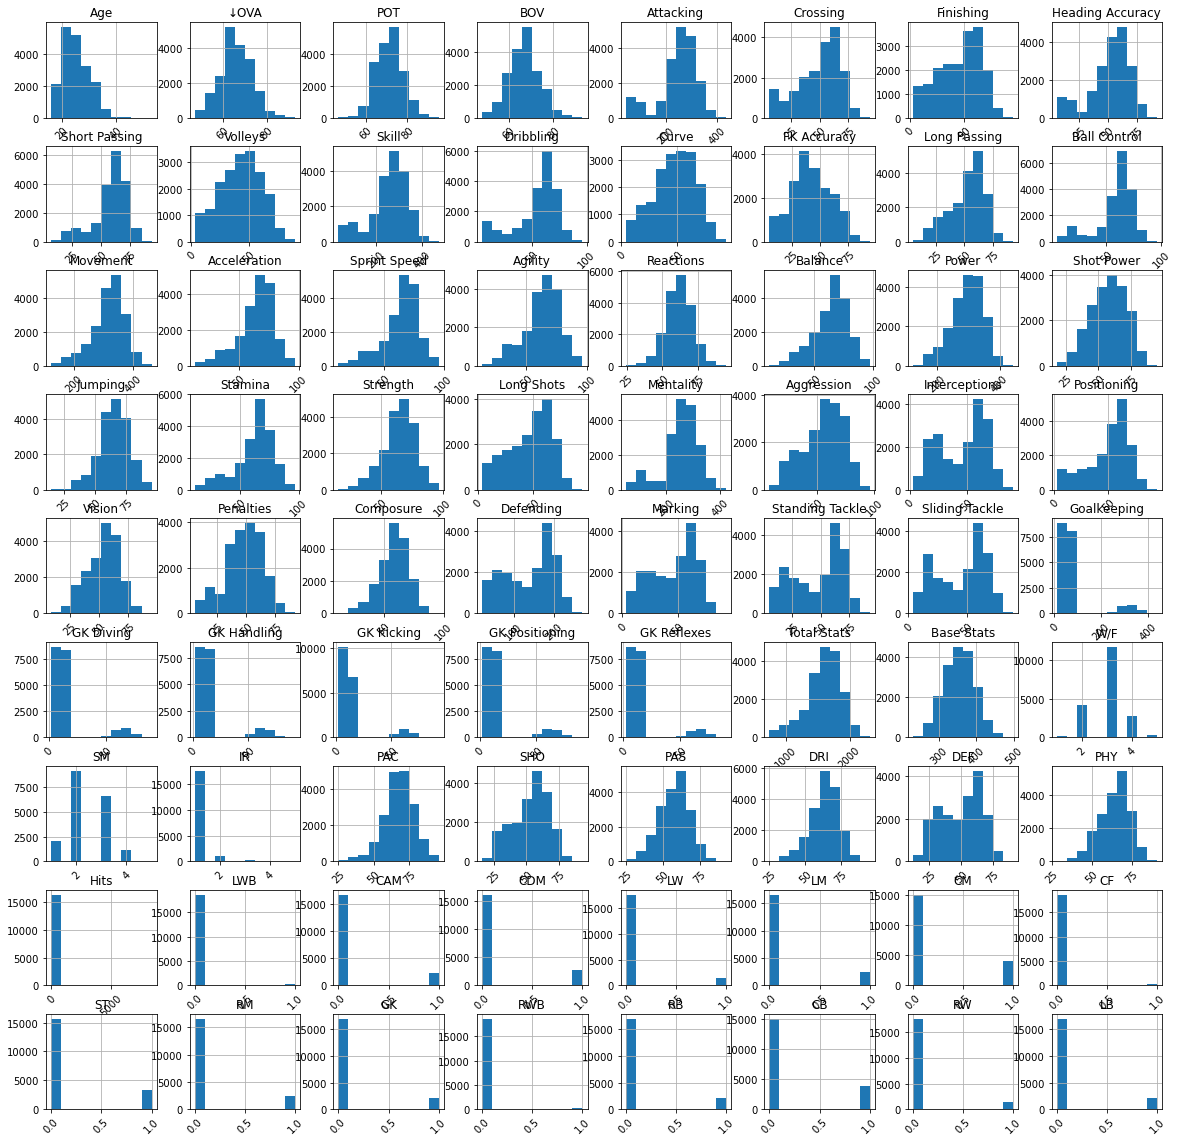

In [193]:
#visual approach to explorwe distribution in the features

df2New.hist(figsize= (20,20),xrot= 45)

In [194]:
#TREATMENT OF MISSING/NAN VALUES
#The following features will be treated my filling with their median values due to the features having high values as standard deviation compared to their mean values

In [195]:
df_clean = df2New.copy()

In [196]:
df_clean 

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,...,RWB,RB,CB,RW,LB,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
0,33,93.0,93.0,Left,93,RW,429.0,85.0,95.0,70.0,...,0,0,0,1,0,70,80,600000,150000000,150000000
1,35,92.0,92.0,Right,92,ST,437.0,84.0,95.0,90.0,...,0,0,0,0,0,130,90,250000,100000000,100000000
2,27,91.0,93.0,Right,91,GK,95.0,13.0,11.0,15.0,...,0,0,0,0,0,140,90,150000,150000000,150000000
3,29,91.0,91.0,Right,91,CAM,407.0,94.0,82.0,55.0,...,0,0,0,0,0,110,70,400000,150000000,150000000
4,28,91.0,91.0,Right,91,LW,408.0,85.0,87.0,62.0,...,0,0,0,0,0,90,70,300000,150000000,150000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,21,47.0,55.0,Right,49,CB,145.0,23.0,26.0,43.0,...,0,0,1,0,0,100,70,50000,50000000,50000000
19017,17,47.0,67.0,Right,51,CAM,211.0,38.0,42.0,40.0,...,0,0,0,0,0,90,70,500000,50000000,50000000
19018,18,47.0,65.0,Right,49,CAM,200.0,30.0,34.0,43.0,...,0,0,0,0,0,100,80,500000,50000000,50000000
19019,20,47.0,57.0,Right,48,ST,215.0,45.0,52.0,34.0,...,0,0,0,1,0,90,70,50000,50000000,50000000


In [197]:
df_clean.Hits.unique()

array([7.71e+02, 5.62e+02, 1.50e+02, 2.07e+02, 5.95e+02, 2.48e+02,
       2.46e+02, 1.20e+02, 1.60e+03, 1.30e+02, 3.21e+02, 1.89e+02,
       1.75e+02, 9.60e+01, 1.18e+02, 2.16e+02, 2.12e+02, 1.54e+02,
       2.05e+02, 2.02e+02, 3.39e+02, 4.08e+02, 1.03e+02, 3.32e+02,
       8.60e+01, 1.73e+02, 1.61e+02, 3.96e+02, 1.10e+03, 4.33e+02,
       2.42e+02, 2.06e+02, 1.77e+02, 1.50e+03, 1.98e+02, 4.59e+02,
       1.17e+02, 1.19e+02, 2.09e+02, 8.40e+01, 1.87e+02, 1.65e+02,
       2.03e+02, 6.50e+01, 3.36e+02, 1.26e+02, 3.13e+02, 1.24e+02,
       1.45e+02, 5.38e+02, 1.82e+02, 1.01e+02, 4.50e+01, 3.77e+02,
       9.90e+01, 1.94e+02, 4.03e+02, 4.14e+02, 5.93e+02, 3.74e+02,
       2.45e+02, 3.20e+03, 2.66e+02, 2.99e+02, 3.09e+02, 2.15e+02,
       2.65e+02, 2.11e+02, 1.12e+02, 3.37e+02, 7.00e+01, 1.59e+02,
       6.88e+02, 1.16e+02, 6.30e+01, 1.44e+02, 1.23e+02, 7.10e+01,
       2.24e+02, 1.13e+02, 1.68e+02, 6.10e+01, 8.90e+01, 1.37e+02,
       2.78e+02, 7.50e+01, 1.48e+02, 1.76e+02, 1.97e+02, 2.64e

In [198]:
 df_clean_train= df_clean[~df_clean.isnull().any(axis=1)] 

In [199]:
df_clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16276 entries, 0 to 16383
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 16276 non-null  int64   
 1   ↓OVA                16276 non-null  float64 
 2   POT                 16276 non-null  float64 
 3   Preferred Foot      16276 non-null  object  
 4   BOV                 16276 non-null  int64   
 5   Best Position       16276 non-null  object  
 6   Attacking           16276 non-null  float64 
 7   Crossing            16276 non-null  float64 
 8   Finishing           16276 non-null  float64 
 9   Heading Accuracy    16276 non-null  float64 
 10  Short Passing       16276 non-null  float64 
 11  Volleys             16276 non-null  float64 
 12  Skill               16276 non-null  float64 
 13  Dribbling           16276 non-null  float64 
 14  Curve               16276 non-null  float64 
 15  FK Accuracy         16276 non-null  

In [200]:
df_cleanTest =df_clean[df_clean['Hits'].isnull()]
df_cleanTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2646 entries, 16245 to 19020
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 2646 non-null   int64   
 1   ↓OVA                2646 non-null   float64 
 2   POT                 2646 non-null   float64 
 3   Preferred Foot      2646 non-null   object  
 4   BOV                 2646 non-null   int64   
 5   Best Position       2646 non-null   object  
 6   Attacking           2646 non-null   float64 
 7   Crossing            2646 non-null   float64 
 8   Finishing           2646 non-null   float64 
 9   Heading Accuracy    2645 non-null   float64 
 10  Short Passing       2645 non-null   float64 
 11  Volleys             2645 non-null   float64 
 12  Skill               2645 non-null   float64 
 13  Dribbling           2646 non-null   float64 
 14  Curve               2646 non-null   float64 
 15  FK Accuracy         2644 non-null

In [201]:
print(df_clean_train.isna().sum().to_list())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [202]:
#df_clean.fillna(df_clean.median(), inplace=True)

In [203]:
df_clean_train.shape

(16276, 82)

In [204]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19021 entries, 0 to 19020
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 19021 non-null  int64   
 1   ↓OVA                19019 non-null  float64 
 2   POT                 19020 non-null  float64 
 3   Preferred Foot      19021 non-null  object  
 4   BOV                 19021 non-null  int64   
 5   Best Position       19021 non-null  object  
 6   Attacking           19020 non-null  float64 
 7   Crossing            19020 non-null  float64 
 8   Finishing           19016 non-null  float64 
 9   Heading Accuracy    19013 non-null  float64 
 10  Short Passing       19012 non-null  float64 
 11  Volleys             19014 non-null  float64 
 12  Skill               19015 non-null  float64 
 13  Dribbling           19020 non-null  float64 
 14  Curve               19013 non-null  float64 
 15  FK Accuracy         19015 non-null  

In [205]:
df_clean['D/W'].unique()

array(['Low', 'Medium', 'High', nan], dtype=object)

In [206]:
print(df_clean.isnull().sum().to_list())

[0, 2, 1, 0, 0, 0, 1, 1, 5, 8, 9, 7, 6, 1, 8, 6, 3, 3, 5, 4, 3, 2, 4, 7, 1, 2, 4, 1, 5, 7, 6, 0, 4, 1, 0, 1, 1, 1, 2, 3, 1, 3, 1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 3, 3, 5, 2, 5, 1, 2646, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [207]:
df_clean['D/W'].value_counts()

Medium    13987
High       3303
Low        1730
Name: D/W, dtype: int64

In [208]:
df_clean['D/W']= df_clean['D/W'].fillna('Medium')

In [209]:
df_clean['D/W'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [210]:
#Drooping Nan values
#df_clean=  df2New.dropna()

In [211]:
len(df_clean)-len(df_clean_train)

2745

In [212]:
#  Handle duplicates

print("Duplicates in dataset:", df_clean.duplicated().sum())
print("Duplicates in Train dataset:", df_clean_train.duplicated().sum())

Duplicates in dataset: 42
Duplicates in Train dataset: 42


In [213]:
# droping duplicates 
df_clean1 = df_clean_train.drop_duplicates(inplace=False)
df_clean1.tail()

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,...,RWB,RB,CB,RW,LB,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
16379,28,58.0,58.0,Left,59,CAM,258.0,54.0,53.0,44.0,...,0,0,0,0,0,90,80,500000,50000000,50000000
16380,18,58.0,74.0,Right,60,CB,202.0,32.0,26.0,63.0,...,0,0,1,0,0,160,80,50000,50000000,50000000
16381,24,58.0,64.0,Left,58,GK,108.0,15.0,19.0,22.0,...,0,0,0,0,0,160,80,50000,50000000,50000000
16382,17,58.0,75.0,Right,59,RM,256.0,51.0,59.0,43.0,...,0,0,0,0,0,100,70,500000,50000000,50000000
16383,20,58.0,75.0,Left,60,ST,230.0,31.0,60.0,55.0,...,0,0,0,0,0,140,80,50000,50000000,50000000


In [214]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16234 entries, 0 to 16383
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 16234 non-null  int64   
 1   ↓OVA                16234 non-null  float64 
 2   POT                 16234 non-null  float64 
 3   Preferred Foot      16234 non-null  object  
 4   BOV                 16234 non-null  int64   
 5   Best Position       16234 non-null  object  
 6   Attacking           16234 non-null  float64 
 7   Crossing            16234 non-null  float64 
 8   Finishing           16234 non-null  float64 
 9   Heading Accuracy    16234 non-null  float64 
 10  Short Passing       16234 non-null  float64 
 11  Volleys             16234 non-null  float64 
 12  Skill               16234 non-null  float64 
 13  Dribbling           16234 non-null  float64 
 14  Curve               16234 non-null  float64 
 15  FK Accuracy         16234 non-null  

#  To change the  "Hits" column to be last column

In [215]:

df_clean1 = df_clean_train[['Age',
 '↓OVA',
 'POT',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY','Player_Status',
 'RB',
 'LB',
 'LW',
 'LWB',
 'ST',
 'CB',
 'GK',
 'CM',
 'CF',
 'CDM',
 'CAM',
 'RWB',
 'RM',
 'RW',
 'LM',
 'Height_bin',
 'Weight_bin',
 'Wage_bin',
 'Value_bin',
 'Release_Clause_bin','Hits']]

In [216]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16276 entries, 0 to 16383
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 16276 non-null  int64   
 1   ↓OVA                16276 non-null  float64 
 2   POT                 16276 non-null  float64 
 3   Preferred Foot      16276 non-null  object  
 4   BOV                 16276 non-null  int64   
 5   Best Position       16276 non-null  object  
 6   Attacking           16276 non-null  float64 
 7   Crossing            16276 non-null  float64 
 8   Finishing           16276 non-null  float64 
 9   Heading Accuracy    16276 non-null  float64 
 10  Short Passing       16276 non-null  float64 
 11  Volleys             16276 non-null  float64 
 12  Skill               16276 non-null  float64 
 13  Dribbling           16276 non-null  float64 
 14  Curve               16276 non-null  float64 
 15  FK Accuracy         16276 non-null  

In [217]:
continuous_vars=df_clean1.select_dtypes('float64').columns
print(continuous_vars)
categorical_vars=df_clean1.select_dtypes('object').columns
print(categorical_vars)

Index(['↓OVA', 'POT', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Interceptions', 'Positioning', 'Penalties', 'Composure',
       'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'Total Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY', 'Hits'],
      dtype='object')
Index(['Preferred Foot', 'Best Position', 'A/W', 'D/W', 'Player_Status'], dtype='object')


In [218]:
# Step 1: Identify presence of multicolinearity in the data

cor =df_clean1.corr()
cor
#Objective: 

'''
if any two features have a correlation score greater than 0.8, this indicates the presence of multicolinearity
We will need to drop one of the features from our data

'''

'\nif any two features have a correlation score greater than 0.8, this indicates the presence of multicolinearity\nWe will need to drop one of the features from our data\n\n'

In [219]:
cor

,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,GK,CM,CF,CDM,CAM,RWB,RM,RW,LM,Hits
Age,1.000000,0.312978,-0.414063,0.224558,0.035116,0.015712,-0.001984,0.064327,0.011868,0.058140,...,0.125855,-0.032129,0.001703,0.015882,-0.053908,0.000628,-0.043064,-0.065194,-0.034374,-0.122831
↓OVA,0.312978,1.000000,0.629077,0.982024,0.354893,0.312022,0.256419,0.236047,0.405038,0.307529,...,-0.009324,0.027851,0.059875,0.027228,0.041410,0.012994,0.025325,0.024696,0.026448,0.230409
POT,-0.414063,0.629077,1.000000,0.680476,0.224174,0.196480,0.171880,0.121211,0.297729,0.178414,...,-0.043929,0.046047,0.047790,0.015160,0.068447,-0.003859,0.014059,0.053899,0.013117,0.332073
BOV,0.224558,0.982024,0.680476,1.000000,0.398073,0.327009,0.297886,0.278054,0.455763,0.342913,...,-0.067110,0.080855,0.069070,0.048531,0.074453,-0.000981,0.021865,0.024081,0.020617,0.246999
Attacking,0.035116,0.354893,0.224174,0.398073,1.000000,0.842274,0.880592,0.705242,0.882576,0.892399,...,-0.824421,0.221416,0.115195,0.117168,0.222244,0.025602,0.200125,0.139271,0.204855,0.110593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RWB,0.000628,0.012994,-0.003859,-0.000981,0.025602,0.103202,-0.022133,0.018861,0.032689,-0.019276,...,-0.047937,-0.062647,-0.017887,-0.054629,-0.048482,1.000000,0.060640,0.487278,-0.046443,0.009169
RM,-0.043064,0.025325,0.014059,0.021865,0.200125,0.263780,0.256350,-0.055418,0.135649,0.216323,...,-0.130955,-0.069012,0.004727,-0.137117,0.087719,0.060640,1.000000,0.100864,0.305550,0.002353
RW,-0.065194,0.024696,0.053899,0.024081,0.139271,0.187024,0.172687,-0.020769,0.080458,0.146936,...,-0.098378,-0.117133,0.023618,-0.122560,0.003848,0.487278,0.100864,1.000000,-0.064549,0.032947
LM,-0.034374,0.026448,0.013117,0.020617,0.204855,0.270180,0.260676,-0.057836,0.138652,0.224404,...,-0.132945,-0.082330,0.010679,-0.153321,0.094629,-0.046443,0.305550,-0.064549,1.000000,0.008630


# DETECTION  OF OUTLIERS

In [220]:
'''scatter_matrix(df_clean[continuous_vars])
plt.gcf().set_size_inches(20,40)
plt.show()'''

'scatter_matrix(df_clean[continuous_vars])\nplt.gcf().set_size_inches(20,40)\nplt.show()'

In [221]:
def outlier_lims(col):
    q3,q1 = np.percentile(col, [75,25])
    iqr = q3-q1
    upper_lim = q3 + 1.5*iqr
    lower_lim = q1 - 1.5*iqr
    return upper_lim, lower_lim

In [222]:
for col in continuous_vars:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(df_clean1[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(df_clean1.loc[df_clean1[col]<LL,col]) + len(df_clean1.loc[df_clean1[col]>UL,col])
    percent = (total_outliers / len(df_clean1.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: ↓OVA
Upper Limit = 83.0
Lower Limit = 51.0
Percentage of Outliers= 0.8724502334725976
-------------------------------------------------- 

--------------------------------------------------
Column: POT
Upper Limit = 88.0
Lower Limit = 56.0
Percentage of Outliers= 0.3747849594494962
-------------------------------------------------- 

--------------------------------------------------
Column: Attacking
Upper Limit = 405.0
Lower Limit = 133.0
Percentage of Outliers= 10.199066109609241
-------------------------------------------------- 

--------------------------------------------------
Column: Crossing
Upper Limit = 101.0
Lower Limit = 5.0
Percentage of Outliers= 0.0
-------------------------------------------------- 

--------------------------------------------------
Column: Finishing
Upper Limit = 109.5
Lower Limit = -14.5
Percentage of Outliers= 0.0
-------------------------------------------------- 

-----------------------

In [223]:
df_clean1.select_dtypes(include='float64').skew()

↓OVA                 0.682145
POT                  0.331974
Attacking           -1.250548
Crossing            -0.786263
Finishing           -0.416696
Heading Accuracy    -0.990704
Short Passing       -1.415936
Volleys             -0.245089
Skill               -0.964047
Dribbling           -1.288678
Curve               -0.385565
FK Accuracy          0.020373
Long Passing        -0.746836
Ball Control        -1.583393
Movement            -0.763668
Acceleration        -0.811474
Sprint Speed        -0.826986
Agility             -0.677333
Reactions            0.145148
Balance             -0.616439
Power               -0.583321
Shot Power          -0.350139
Jumping             -0.463093
Stamina             -1.033973
Strength            -0.497239
Long Shots          -0.563209
Mentality           -1.113699
Interceptions       -0.387301
Positioning         -0.883845
Penalties           -0.382578
Composure           -0.593422
Defending           -0.401829
Marking             -0.449447
Standing T

In [224]:
#using log transformation for Value,Wage,Release Clause,Goalkeeping,GK Diving,GK Handling  and GK Positioning to reduce skewness
df_clean1[['Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning']] = np.log1p(df_clean1[['Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning']])

In [225]:
df_clean1.select_dtypes(include='float64').skew()

↓OVA                 0.682145
POT                  0.331974
Attacking           -1.250548
Crossing            -0.786263
Finishing           -0.416696
Heading Accuracy    -0.990704
Short Passing       -1.415936
Volleys             -0.245089
Skill               -0.964047
Dribbling           -1.288678
Curve               -0.385565
FK Accuracy          0.020373
Long Passing        -0.746836
Ball Control        -1.583393
Movement            -0.763668
Acceleration        -0.811474
Sprint Speed        -0.826986
Agility             -0.677333
Reactions            0.145148
Balance             -0.616439
Power               -0.583321
Shot Power          -0.350139
Jumping             -0.463093
Stamina             -1.033973
Strength            -0.497239
Long Shots          -0.563209
Mentality           -1.113699
Interceptions       -0.387301
Positioning         -0.883845
Penalties           -0.382578
Composure           -0.593422
Defending           -0.401829
Marking             -0.449447
Standing T

In [226]:
for col in continuous_vars:
    print("--------------------------------------------------")
    print("Column:", col)
    
    UL,LL = outlier_lims(df_clean1[col])
    print("Upper Limit =", UL)
    print("Lower Limit =", LL)
    
    total_outliers = len(df_clean1.loc[df_clean1[col]<LL,col]) + len(df_clean1.loc[df_clean1[col]>UL,col])
    percent = (total_outliers / len(df_clean.index) )*100
    
    print("Percentage of Outliers=", percent)
    print("-------------------------------------------------- \n")

--------------------------------------------------
Column: ↓OVA
Upper Limit = 83.0
Lower Limit = 51.0
Percentage of Outliers= 0.7465432942537196
-------------------------------------------------- 

--------------------------------------------------
Column: POT
Upper Limit = 88.0
Lower Limit = 56.0
Percentage of Outliers= 0.32069817570054154
-------------------------------------------------- 

--------------------------------------------------
Column: Attacking
Upper Limit = 405.0
Lower Limit = 133.0
Percentage of Outliers= 8.727196256768835
-------------------------------------------------- 

--------------------------------------------------
Column: Crossing
Upper Limit = 101.0
Lower Limit = 5.0
Percentage of Outliers= 0.0
-------------------------------------------------- 

--------------------------------------------------
Column: Finishing
Upper Limit = 109.5
Lower Limit = -14.5
Percentage of Outliers= 0.0
-------------------------------------------------- 

-----------------------

# REMOVAL OF OUTLIERS USING ZSCORE


From the dataset we can see that some features contains outliers (that are extremely far points from the mean), to treat this I would use zscore for the treatment of the outlier with a zscore value set to be equal to 3

In [227]:
zscores = np.abs(zscore(df_clean1[['Attacking', 'Heading Accuracy', 'Short Passing','Skill','Dribbling' ,'Ball Control', 'Movement','Acceleration', 'Sprint Speed', 'Agility', 'Jumping', 'Mentality','Positioning','Composure', 'Goalkeeping', 'GK Diving', 'GK Handling','GK Kicking', 'GK Positioning', 'Total Stats', 'PAC','DRI','Hits']]))
filtered_entries = (zscores <3).all(axis=1)
clean_df = df_clean1[filtered_entries]

In [228]:
print(df_clean1.shape)
print(clean_df.shape)

(16276, 82)
(15025, 82)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Finishing'>

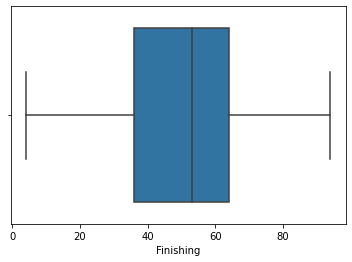

In [229]:
sns.boxplot(clean_df['Finishing'])

In [230]:
clean_df.describe()

,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,...,GK,CM,CF,CDM,CAM,RWB,RM,RW,LM,Hits
count,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.00000,...,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000
mean,25.791015,67.308686,71.707088,68.306023,267.649850,53.890849,49.576905,55.478136,62.584160,46.11980,...,0.053111,0.222296,0.022030,0.167787,0.126389,0.021364,0.141897,0.084725,0.145358,19.445458
std,4.365718,5.439927,5.689072,5.315504,59.373826,15.781077,17.747691,14.686770,11.097526,16.16223,...,0.224263,0.415803,0.146786,0.373689,0.332299,0.144601,0.348956,0.278482,0.352473,44.109734
min,16.000000,58.000000,58.000000,58.000000,51.000000,6.000000,4.000000,5.000000,20.000000,4.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,63.000000,68.000000,64.000000,243.000000,45.000000,36.000000,48.000000,58.000000,34.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,26.000000,67.000000,71.000000,68.000000,275.000000,58.000000,53.000000,58.000000,64.000000,48.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,29.000000,71.000000,75.000000,72.000000,304.000000,65.000000,64.000000,65.000000,69.000000,58.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
max,43.000000,91.000000,92.000000,91.000000,429.000000,94.000000,94.000000,93.000000,94.000000,90.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,411.000000


In [231]:
Numerical_vars=clean_df.select_dtypes('float64').columns
print(Numerical_vars)
categorical_data=clean_df.select_dtypes('object').columns
print(categorical_data)

Index(['↓OVA', 'POT', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Interceptions', 'Positioning', 'Penalties', 'Composure',
       'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'Total Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY', 'Hits'],
      dtype='object')
Index(['Preferred Foot', 'Best Position', 'A/W', 'D/W', 'Player_Status'], dtype='object')


### Task 2: FEATURE PREPROCESSING AND TRANSFORMATION

The independent variables will be tagged predictors_df, while the dependent variable will be tagged target_df.

In [232]:
predictors_df = clean_df.drop(columns='Hits')
target_df = clean_df['Hits']

In [233]:
print(predictors_df.shape)
print(target_df.shape)

(15025, 81)
(15025,)


In [234]:
predictors_df.columns

Index(['Age', '↓OVA', 'POT', 'Preferred Foot', 'BOV', 'Best Position',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Player_Status', 'RB', 'LB', 'LW', 'LWB', 'ST',
       'CB', 'GK', 'CM', 'CF', 'CDM', 'CAM', 'RWB', 'RM', 'RW', 'LM',
       'Height_bin', 'Weight_bin', 'Wage_bin', 'Value_bin',
       'Re

# Handling categorical data (label encoding)

In [235]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

predictors_df['Preferred Foot']= encoder.fit_transform(predictors_df['Preferred Foot'])

In [236]:
predictors_df['Best Position'] = encoder.fit_transform(predictors_df['Best Position'])

In [237]:
predictors_df['A/W'] = encoder.fit_transform(predictors_df['A/W'])

In [238]:
predictors_df['D/W'] = encoder.fit_transform(predictors_df['D/W'])

In [239]:
predictors_df['Player_Status'] = encoder.fit_transform(predictors_df['Player_Status'])

In [240]:
predictors_df['Height_bin'] = encoder.fit_transform(predictors_df['Height_bin'])

In [241]:
predictors_df['Weight_bin'] = encoder.fit_transform(predictors_df['Weight_bin'])

In [242]:
predictors_df['Wage_bin'] = encoder.fit_transform(predictors_df['Wage_bin'])

In [243]:
predictors_df['Value_bin'] = encoder.fit_transform(predictors_df['Value_bin'])

In [244]:
predictors_df['Release_Clause_bin'] = encoder.fit_transform(predictors_df['Release_Clause_bin'])

In [245]:
predictors_df

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,...,CAM,RWB,RM,RW,LM,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
3,29,91.0,91.0,1,91,0,407.0,94.0,82.0,55.0,...,1,0,0,0,0,10,3,7,2,2
5,31,91.0,91.0,1,91,14,423.0,71.0,94.0,85.0,...,0,0,0,0,0,11,4,4,2,2
6,28,90.0,90.0,0,90,12,392.0,79.0,91.0,59.0,...,0,0,0,1,0,8,4,4,2,2
10,28,90.0,91.0,1,90,1,316.0,53.0,52.0,87.0,...,0,0,0,0,0,15,6,4,2,2
11,28,90.0,90.0,1,90,8,410.0,76.0,90.0,84.0,...,0,0,0,0,0,8,3,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,28,58.0,58.0,0,59,0,258.0,54.0,53.0,44.0,...,1,0,1,0,0,8,4,8,0,0
16380,18,58.0,74.0,1,60,1,202.0,32.0,26.0,63.0,...,0,0,0,0,0,15,4,0,0,0
16381,24,58.0,64.0,0,58,5,108.0,15.0,19.0,22.0,...,0,0,0,0,0,15,4,0,0,0
16382,17,58.0,75.0,1,59,11,256.0,51.0,59.0,43.0,...,0,0,1,0,0,9,3,8,0,0


In [246]:
#Checking the stastical properties of the Data:- 
#Due to wide scale in the features- Requires rescaling
#Very high standard deviation in the features- Requires standization
#Most of the features are near Nornamally distibuted

In [247]:
predictors_df.describe()

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,...,CAM,RWB,RM,RW,LM,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
count,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,...,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000,15025.000000
mean,25.791015,67.308686,71.707088,0.745092,68.306023,5.975973,267.649850,53.890849,49.576905,55.478136,...,0.126389,0.021364,0.141897,0.084725,0.145358,10.125391,3.904892,1.449251,0.229151,0.229151
std,4.365718,5.439927,5.689072,0.435824,5.315504,5.042540,59.373826,15.781077,17.747691,14.686770,...,0.332299,0.144601,0.348956,0.278482,0.352473,2.508688,0.743318,3.743965,0.987678,0.987678
min,16.000000,58.000000,58.000000,0.000000,58.000000,0.000000,51.000000,6.000000,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,63.000000,68.000000,0.000000,64.000000,1.000000,243.000000,45.000000,36.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,0.000000,0.000000,0.000000
50%,26.000000,67.000000,71.000000,1.000000,68.000000,5.000000,275.000000,58.000000,53.000000,58.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.000000,0.000000,0.000000,0.000000
75%,29.000000,71.000000,75.000000,1.000000,72.000000,11.000000,304.000000,65.000000,64.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,4.000000,0.000000,0.000000,0.000000
max,43.000000,91.000000,92.000000,1.000000,91.000000,14.000000,429.000000,94.000000,94.000000,93.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,7.000000,17.000000,6.000000,6.000000


<AxesSubplot:ylabel='Density'>

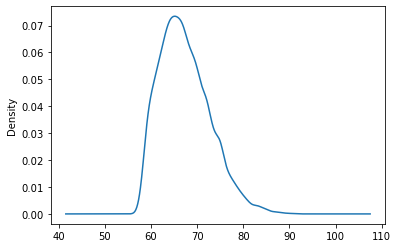

In [248]:
predictors_df['↓OVA'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

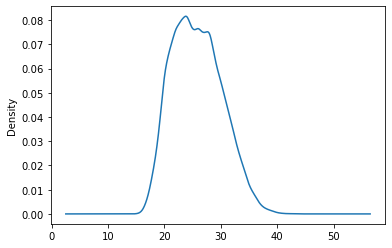

In [249]:
predictors_df.Age.plot(kind='density')

<AxesSubplot:ylabel='Density'>

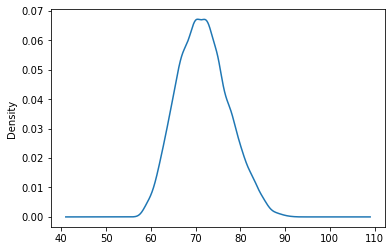

In [250]:
predictors_df['POT'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

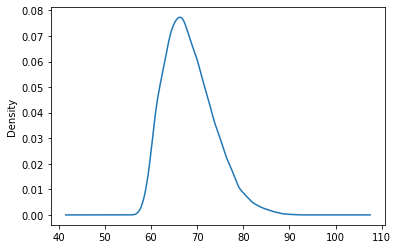

In [251]:
predictors_df['BOV'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

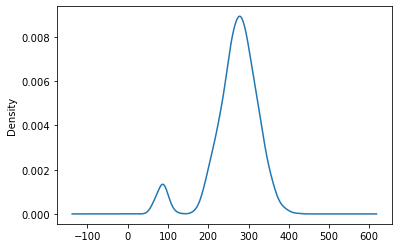

In [252]:
predictors_df['Attacking'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

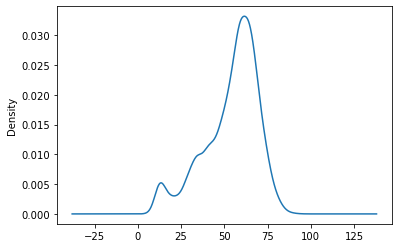

In [253]:
predictors_df['Crossing'].plot(kind='density')

In [254]:
#RESCALING OF THE DATASET
predictors_df.shape

(15025, 81)

In [255]:
predictors_dfArr=predictors_df.values
predictors_dfArr

array([[29., 91., 91., ...,  7.,  2.,  2.],
       [31., 91., 91., ...,  4.,  2.,  2.],
       [28., 90., 90., ...,  4.,  2.,  2.],
       ...,
       [24., 58., 64., ...,  0.,  0.,  0.],
       [17., 58., 75., ...,  8.,  0.,  0.],
       [20., 58., 75., ...,  0.,  0.,  0.]])

In [256]:
X= predictors_dfArr[:, 0:81]

In [257]:
X

array([[29., 91., 91., ...,  7.,  2.,  2.],
       [31., 91., 91., ...,  4.,  2.,  2.],
       [28., 90., 90., ...,  4.,  2.,  2.],
       ...,
       [24., 58., 64., ...,  0.,  0.,  0.],
       [17., 58., 75., ...,  8.,  0.,  0.],
       [20., 58., 75., ...,  0.,  0.,  0.]])

In [258]:
scaler = MinMaxScaler(feature_range=(0, 1)) #Caalling the constructor of the MinMaxScaler Class. Specify range
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=1)
rescaledX

array([[0.5, 1. , 1. , ..., 0.4, 0.3, 0.3],
       [0.6, 1. , 1. , ..., 0.2, 0.3, 0.3],
       [0.4, 1. , 0.9, ..., 0.2, 0.3, 0.3],
       ...,
       [0.3, 0. , 0.2, ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0.5, 0. , 0. ],
       [0.1, 0. , 0.5, ..., 0. , 0. , 0. ]])

In [259]:
col= list(predictors_df.columns)
col

['Age',
 '↓OVA',
 'POT',
 'Preferred Foot',
 'BOV',
 'Best Position',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 'Player_Status',
 'RB',
 'LB',
 'LW',
 'LWB',
 'ST',
 'CB',
 'GK',
 'CM',
 'CF',
 'CDM',
 'CAM',
 'RWB',
 'RM',
 'RW',
 'LM',
 'Height_bin',
 'Weight_bin',
 'Wage_bin',
 'Value_bin',
 'Release_Clause_bin']

In [260]:
# converting the rescaled X to a dataframe and adding back Y

rescaledXDF = pd.DataFrame(rescaledX, columns =[col])
# adding back the outcome column

rescaledXDF
#rescaledXDF['Hits'] = clean_df['Hits']

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,...,CAM,RWB,RM,RW,LM,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
0,0.481481,1.000000,0.970588,1.0,1.000000,0.000000,0.941799,1.000000,0.866667,0.568182,...,1.0,0.0,0.0,0.0,0.0,0.555556,0.428571,0.411765,0.333333,0.333333
1,0.555556,1.000000,0.970588,1.0,1.000000,1.000000,0.984127,0.738636,1.000000,0.909091,...,0.0,0.0,0.0,0.0,0.0,0.611111,0.571429,0.235294,0.333333,0.333333
2,0.444444,0.969697,0.941176,0.0,0.969697,0.857143,0.902116,0.829545,0.966667,0.613636,...,0.0,0.0,0.0,1.0,0.0,0.444444,0.571429,0.235294,0.333333,0.333333
3,0.444444,0.969697,0.970588,1.0,0.969697,0.071429,0.701058,0.534091,0.533333,0.931818,...,0.0,0.0,0.0,0.0,0.0,0.833333,0.857143,0.235294,0.333333,0.333333
4,0.444444,0.969697,0.941176,1.0,0.969697,0.571429,0.949735,0.795455,0.955556,0.897727,...,0.0,0.0,0.0,0.0,0.0,0.444444,0.428571,0.235294,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15020,0.444444,0.000000,0.000000,0.0,0.030303,0.000000,0.547619,0.545455,0.544444,0.443182,...,1.0,0.0,1.0,0.0,0.0,0.444444,0.571429,0.470588,0.000000,0.000000
15021,0.074074,0.000000,0.470588,1.0,0.060606,0.071429,0.399471,0.295455,0.244444,0.659091,...,0.0,0.0,0.0,0.0,0.0,0.833333,0.571429,0.000000,0.000000,0.000000
15022,0.296296,0.000000,0.176471,0.0,0.000000,0.357143,0.150794,0.102273,0.166667,0.193182,...,0.0,0.0,0.0,0.0,0.0,0.833333,0.571429,0.000000,0.000000,0.000000
15023,0.037037,0.000000,0.500000,1.0,0.030303,0.785714,0.542328,0.511364,0.611111,0.431818,...,0.0,0.0,1.0,0.0,0.0,0.500000,0.428571,0.470588,0.000000,0.000000


In [261]:
rescaledXDF

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,...,CAM,RWB,RM,RW,LM,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
0,0.481481,1.000000,0.970588,1.0,1.000000,0.000000,0.941799,1.000000,0.866667,0.568182,...,1.0,0.0,0.0,0.0,0.0,0.555556,0.428571,0.411765,0.333333,0.333333
1,0.555556,1.000000,0.970588,1.0,1.000000,1.000000,0.984127,0.738636,1.000000,0.909091,...,0.0,0.0,0.0,0.0,0.0,0.611111,0.571429,0.235294,0.333333,0.333333
2,0.444444,0.969697,0.941176,0.0,0.969697,0.857143,0.902116,0.829545,0.966667,0.613636,...,0.0,0.0,0.0,1.0,0.0,0.444444,0.571429,0.235294,0.333333,0.333333
3,0.444444,0.969697,0.970588,1.0,0.969697,0.071429,0.701058,0.534091,0.533333,0.931818,...,0.0,0.0,0.0,0.0,0.0,0.833333,0.857143,0.235294,0.333333,0.333333
4,0.444444,0.969697,0.941176,1.0,0.969697,0.571429,0.949735,0.795455,0.955556,0.897727,...,0.0,0.0,0.0,0.0,0.0,0.444444,0.428571,0.235294,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15020,0.444444,0.000000,0.000000,0.0,0.030303,0.000000,0.547619,0.545455,0.544444,0.443182,...,1.0,0.0,1.0,0.0,0.0,0.444444,0.571429,0.470588,0.000000,0.000000
15021,0.074074,0.000000,0.470588,1.0,0.060606,0.071429,0.399471,0.295455,0.244444,0.659091,...,0.0,0.0,0.0,0.0,0.0,0.833333,0.571429,0.000000,0.000000,0.000000
15022,0.296296,0.000000,0.176471,0.0,0.000000,0.357143,0.150794,0.102273,0.166667,0.193182,...,0.0,0.0,0.0,0.0,0.0,0.833333,0.571429,0.000000,0.000000,0.000000
15023,0.037037,0.000000,0.500000,1.0,0.030303,0.785714,0.542328,0.511364,0.611111,0.431818,...,0.0,0.0,1.0,0.0,0.0,0.500000,0.428571,0.470588,0.000000,0.000000


In [262]:
rescaledXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15025.0,0.362630,0.161693,0.0,0.222222,0.370370,0.481481,1.0
↓OVA,15025.0,0.282081,0.164846,0.0,0.151515,0.272727,0.393939,1.0
POT,15025.0,0.403150,0.167326,0.0,0.294118,0.382353,0.500000,1.0
Preferred Foot,15025.0,0.745092,0.435824,0.0,0.000000,1.000000,1.000000,1.0
BOV,15025.0,0.312304,0.161076,0.0,0.181818,0.303030,0.424242,1.0
...,...,...,...,...,...,...,...,...
Height_bin,15025.0,0.562522,0.139372,0.0,0.444444,0.555556,0.666667,1.0
Weight_bin,15025.0,0.557842,0.106188,0.0,0.428571,0.571429,0.571429,1.0
Wage_bin,15025.0,0.085250,0.220233,0.0,0.000000,0.000000,0.000000,1.0
Value_bin,15025.0,0.038192,0.164613,0.0,0.000000,0.000000,0.000000,1.0


In [263]:
'''We do not need to standize the data since the range of minimum and maximum values are between 0 to 1.
Also the standard deviation is less than one'''

'We do not need to standize the data since the range of minimum and maximum values are between 0 to 1.\nAlso the standard deviation is less than one'

<AxesSubplot:ylabel='Density'>

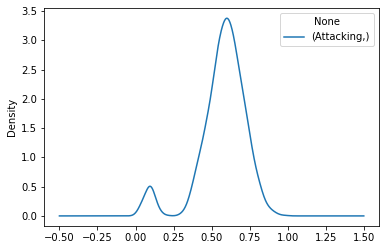

In [264]:
rescaledXDF['Attacking'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

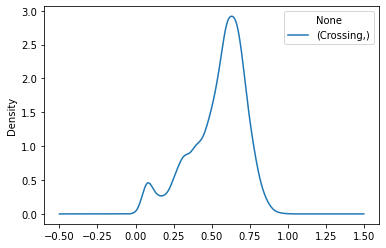

In [265]:
rescaledXDF['Crossing'].plot(kind='density')

In [266]:
#STANDARDIZING THE DATASET
#Standardizing was done to generate a uniform standard deviation for all the features
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(rescaledXDF), columns= rescaledXDF.columns)
standardized_df.head()

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,...,CAM,RWB,RM,RW,LM,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
0,0.735066,4.355224,3.391336,0.584908,4.269535,-1.185151,2.347074,2.541682,1.826952,-0.032557,...,2.629079,-0.147752,-0.406646,-0.304250,-0.412408,-0.049984,-1.217409,1.482635,1.793001,1.793001
1,1.193196,4.355224,3.391336,0.584908,4.269535,1.591320,2.616562,1.084192,2.503119,2.010166,...,-0.380361,-0.147752,-0.406646,-0.304250,-0.412408,0.348644,0.127955,0.681319,1.793001,1.793001
2,0.506001,4.171392,3.215554,-1.709671,4.081400,1.194681,2.094429,1.591145,2.334077,0.239806,...,-0.380361,-0.147752,-0.406646,3.286766,-0.412408,-0.847240,0.127955,0.681319,1.793001,1.793001
3,0.506001,4.171392,3.391336,0.584908,4.081400,-0.986832,0.814362,-0.056452,0.136535,2.146348,...,-0.380361,-0.147752,-0.406646,-0.304250,-0.412408,1.943156,2.818682,0.681319,1.793001,1.793001
4,0.506001,4.171392,3.215554,0.584908,4.081400,0.401404,2.397603,1.401038,2.277730,1.942075,...,-0.380361,-0.147752,-0.406646,-0.304250,-0.412408,-0.847240,-1.217409,0.681319,1.793001,1.793001


In [267]:
standardized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15025.0,5.600401e-16,1.000033,-2.242779,-0.868389,0.047871,0.735066,3.941977
↓OVA,15025.0,-5.625394e-14,1.000033,-1.711235,-0.792075,-0.056746,0.678582,4.355224
POT,15025.0,-4.636158e-15,1.000033,-2.409452,-0.651637,-0.124293,0.578833,3.567117
Preferred Foot,15025.0,2.708235e-15,1.000033,-1.709671,-1.709671,0.584908,0.584908,0.584908
BOV,15025.0,2.958033e-15,1.000033,-1.938925,-0.810114,-0.057574,0.694967,4.269535
...,...,...,...,...,...,...,...,...
Height_bin,15025.0,1.124203e-15,1.000033,-4.036265,-0.847240,-0.049984,0.747272,3.139040
Weight_bin,15025.0,7.231162e-15,1.000033,-5.253499,-1.217409,0.127955,0.127955,4.164046
Wage_bin,15025.0,-3.735151e-14,1.000033,-0.387103,-0.387103,-0.387103,-0.387103,4.153689
Value_bin,15025.0,1.156893e-14,1.000033,-0.232018,-0.232018,-0.232018,-0.232018,5.843038


<AxesSubplot:ylabel='Density'>

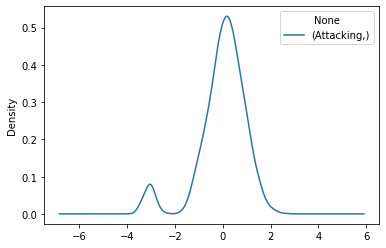

In [268]:
standardized_df['Attacking'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

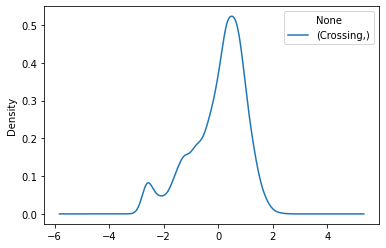

In [269]:
standardized_df['Crossing'].plot(kind='density')

In [270]:
#NORMALIZATION on Rescaled and Standardized data
#From the visualization of the distribution using histogram it can be seen that some features in the dataset were not normal
#Therefore normalization was done to remove skewness from the dataset
scaler = Normalizer()
normalized_df = pd.DataFrame(scaler.fit_transform(standardized_df), columns= standardized_df.columns)
normalized_df.head()

#normalized_df['Hits'] = clean_df['Hits']

,Age,↓OVA,POT,Preferred Foot,BOV,Best Position,Attacking,Crossing,Finishing,Heading Accuracy,...,CAM,RWB,RM,RW,LM,Height_bin,Weight_bin,Wage_bin,Value_bin,Release_Clause_bin
0,0.035341,0.209392,0.163050,0.028121,0.205272,-0.056980,0.112844,0.122200,0.087837,-0.001565,...,0.126402,-0.007104,-0.019551,-0.014628,-0.019828,-0.002403,-0.058531,0.071283,0.086205,0.086205
1,0.060457,0.220673,0.171834,0.029636,0.216331,0.080630,0.132577,0.054934,0.126829,0.101852,...,-0.019272,-0.007486,-0.020604,-0.015416,-0.020896,0.017665,0.006483,0.034521,0.090849,0.090849
2,0.026953,0.222194,0.171280,-0.091068,0.217401,0.063636,0.111562,0.084754,0.124327,0.012774,...,-0.020260,-0.007870,-0.021660,0.175073,-0.021967,-0.045129,0.006816,0.036291,0.095506,0.095506
3,0.029326,0.241760,0.196551,0.033899,0.236545,-0.057194,0.047198,-0.003272,0.007913,0.124395,...,-0.022045,-0.008563,-0.023568,-0.017633,-0.023902,0.112619,0.163362,0.039487,0.103917,0.103917
4,0.026957,0.222229,0.171307,0.031161,0.217435,0.021385,0.127731,0.074640,0.121345,0.103463,...,-0.020264,-0.007871,-0.021664,-0.016209,-0.021971,-0.045136,-0.064857,0.036297,0.095521,0.095521


In [271]:
normalized_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15025.0,-0.004831,0.124913,-0.350374,-0.098858,0.002703,0.081768,0.457293
↓OVA,15025.0,-0.008450,0.113514,-0.351131,-0.094534,-0.009471,0.077467,0.273486
POT,15025.0,-0.005528,0.122598,-0.419466,-0.089201,-0.007390,0.080067,0.376547
Preferred Foot,15025.0,0.000503,0.128794,-0.365629,-0.100288,0.066743,0.081692,0.138712
BOV,15025.0,-0.007368,0.112402,-0.310540,-0.092224,-0.009846,0.078315,0.294935
...,...,...,...,...,...,...,...,...
Height_bin,15025.0,-0.004796,0.119969,-0.466938,-0.089505,-0.006051,0.083371,0.402390
Weight_bin,15025.0,-0.005052,0.120528,-0.451430,-0.120551,0.015949,0.021421,0.489062
Wage_bin,15025.0,-0.002914,0.122329,-0.091802,-0.055901,-0.046966,-0.035892,0.652515
Value_bin,15025.0,-0.005722,0.102950,-0.055024,-0.034025,-0.029286,-0.024319,0.610420


<AxesSubplot:ylabel='Density'>

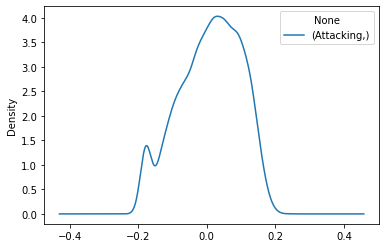

In [272]:
normalized_df['Attacking'].plot(kind='density')

<AxesSubplot:ylabel='Density'>

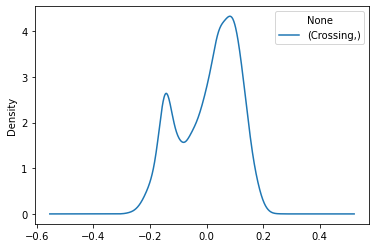

In [273]:
normalized_df['Crossing'].plot(kind='density')

## Task 3: Feature Selection-RFE Technique

In [274]:
# Mediating and moderating effects 

In [275]:
Y= target_df.values

In [276]:
target_df.isnull().sum()

0

In [277]:
Y=Y[:,]

In [278]:
len(Y)

15025

In [279]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

predictors_dfArr=normalized_df.values
X= predictors_dfArr[:, 0:81]
Y
#OPTION A: SELECTING N_FEATURES= 32

model = LogisticRegression() # This is a constructor call to create an instance of the LogisticRegression class
rfe = RFE(model, n_features_to_select=32)
fit = rfe.fit(X,Y) # We are sending our model to school to learn
print(fit.support_)
print(fit.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ True  True  True  True  True  True False False False False False False
 False False False False False False False False False False  True False
 False False  True  True False False False False False False False False
  True False  True False False False False False False False False False
  True  True  True  True  True  True  True False False  True False False
  True False False False  True  True  True False  True  True  True False
 False  True  True  True  True  True  True False False]
[ 1  1  1  1  1  1 46 20 32 18  3 28 48 25 33 15 16 14 38 27 11 21  1  7
 35  6  1  1 13 10 44  8 26 24 19 17  1 43  1 29  9 47 23 34 31 30 40 49
  1  1  1  1  1  1  1 37 36  1 41 39  1  5 22  2  1  1  1 50  1  1  1  4
 12  1  1  1  1  1  1 42 45]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [280]:
print(fit.ranking_)

[ 1  1  1  1  1  1 46 20 32 18  3 28 48 25 33 15 16 14 38 27 11 21  1  7
 35  6  1  1 13 10 44  8 26 24 19 17  1 43  1 29  9 47 23 34 31 30 40 49
  1  1  1  1  1  1  1 37 36  1 41 39  1  5 22  2  1  1  1 50  1  1  1  4
 12  1  1  1  1  1  1 42 45]


In [281]:
len(fit.ranking_)

81

In [300]:
col_Selected=['Age', '↓OVA', 'POT', 'Preferred Foot', 'BOV', 'Best Position','Reactions','Jumping', 'Stamina','Composure','Marking', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC','DRI', 'Player_Status','LWB', 'ST','CB','CM', 'CF', 'CDM','RM', 'RW', 'LM', 'Height_bin', 'Weight_bin', 'Wage_bin']
len(col_Selected)

32

In [283]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

predictors_dfArr=normalized_df.values
X= predictors_dfArr[:, 0:81]
Y

#OPTION B: SELECTING N_FEATURES= 16
model = LogisticRegression() # This is a constructor call to create an instance of the LogisticRegression class
rfe = RFE(model, n_features_to_select=16)
fit1 = rfe.fit(X,Y) # We are sending our model to school to learn
print(fit1.support_)
print(fit1.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[ True  True  True False  True False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False  True  True False  True  True  True False False  True False False
  True False False False False  True  True False False False False False
 False False False False  True False False False False]
[ 1  1  1  5  1 15 62 36 48 34 19 44 64 41 49 31 32 30 54 43 27 37  1 23
 51 22 11 17 29 26 60 24 42 40 35 33  1 59 13 45 25 63 39 50 47 46 56 65
  2  1  1 14  1  1  1 53 52  1 57 55  1 21 38 18  4  1  1 66  8 10 16 20
 28  7  9 12  1  6  3 58 61]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [284]:
print(fit1.ranking_)

[ 1  1  1  5  1 15 62 36 48 34 19 44 64 41 49 31 32 30 54 43 27 37  1 23
 51 22 11 17 29 26 60 24 42 40 35 33  1 59 13 45 25 63 39 50 47 46 56 65
  2  1  1 14  1  1  1 53 52  1 57 55  1 21 38 18  4  1  1 66  8 10 16 20
 28  7  9 12  1  6  3 58 61]


In [301]:
col_Selected1=['Age', '↓OVA', 'POT','BOV', 'Reactions','Composure', 'W/F','SM','D/W','IR', 'PAC','DRI','Player_Status','ST','CB','Height_bin']
len(col_Selected1)

16

In [286]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
predictors_dfArr=normalized_df.values
X= predictors_dfArr[:, 0:81]
Y

#OPTION C: SELECTING N_FEATURES= 10
model = LogisticRegression() # This is a constructor call to create an instance of the LogisticRegression class
rfe = RFE(model, n_features_to_select=10)
fit2 = rfe.fit(X,Y) # We are sending our model to school to learn
print(fit2.support_)
print(fit2.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[ True  True  True False  True False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False  True False False  True  True False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False]
[ 1  1  1 11  1 21 68 42 54 40 25 50 70 47 55 37 38 36 60 49 33 43  1 29
 57 28 17 23 35 32 66 30 48 46 41 39  1 65 19 51 31 69 45 56 53 52 62 71
  8  7  1 20  5  1  1 59 58  2 63 61  1 27 44 24 10  4  3 72 14 16 22 26
 34 13 15 18  6 12  9 64 67]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [287]:
print(fit2.ranking_)

[ 1  1  1 11  1 21 68 42 54 40 25 50 70 47 55 37 38 36 60 49 33 43  1 29
 57 28 17 23 35 32 66 30 48 46 41 39  1 65 19 51 31 69 45 56 53 52 62 71
  8  7  1 20  5  1  1 59 58  2 63 61  1 27 44 24 10  4  3 72 14 16 22 26
 34 13 15 18  6 12  9 64 67]


In [298]:
col_Selected2=['Age', '↓OVA', 'POT','BOV', 'Reactions','Composure','SM','IR', 'PAC','Player_Status',]
len(col_Selected2)

10

In [289]:
clean_df.columns

Index(['Age', '↓OVA', 'POT', 'Preferred Foot', 'BOV', 'Best Position',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Player_Status', 'RB', 'LB', 'LW', 'LWB', 'ST',
       'CB', 'GK', 'CM', 'CF', 'CDM', 'CAM', 'RWB', 'RM', 'RW', 'LM',
       'Height_bin', 'Weight_bin', 'Wage_bin', 'Value_bin',
       'Re

In [302]:
len(col_Selected2)

10

In [315]:
X = predictors_df[col_Selected1].values
Y 

model = LogisticRegression(max_iter=500)
model.fit(X,Y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [316]:
model.score(X,Y)

0.15720465890183027

From the above feature selection, 16 features were selected for model building because they gave better R-square score than 10 or 32 features as seen above. 

## BONUS: Model selection and evaluation

In [305]:
X = predictors_df[col_Selected1].values
Y 

array([207., 248., 246., ...,   5.,   3.,   4.])

In [306]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [307]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
cbt = CatBoostRegressor()
logRegss = LogisticRegression(random_state=42)
lalgRegss= Lasso()
ridge = Ridge()

names = ['Linear Regression','DecisionTree','GradientBoosting','RandomForest','XGB','CATBOOST','logistic_model','Lasso','Rige']
models = {'Linear Regression':lr,'DecisionTree':dt,'GradientBoosting':gb,'RandomForest':rf,'XGB':xgb,'CATBOOST':cbt,'logistic_model':logRegss,'Lasso':lalgRegss,'Rige':ridge}

# Model Selection

In [308]:
def evaluate_models(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores ={}
    for  name, model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [309]:
scores=evaluate_models(models= models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
scores

Learning rate set to 0.05938
0:	learn: 41.8413779	total: 236ms	remaining: 3m 55s
1:	learn: 40.2109456	total: 243ms	remaining: 2m 1s
2:	learn: 38.6540680	total: 249ms	remaining: 1m 22s
3:	learn: 37.1906588	total: 257ms	remaining: 1m 3s
4:	learn: 35.8744114	total: 263ms	remaining: 52.3s
5:	learn: 34.5830167	total: 269ms	remaining: 44.6s
6:	learn: 33.3929388	total: 275ms	remaining: 39s
7:	learn: 32.3845053	total: 281ms	remaining: 34.9s
8:	learn: 31.4016483	total: 289ms	remaining: 31.8s
9:	learn: 30.4989446	total: 294ms	remaining: 29.2s
10:	learn: 29.6307566	total: 302ms	remaining: 27.2s
11:	learn: 28.8523047	total: 311ms	remaining: 25.6s
12:	learn: 28.0950738	total: 317ms	remaining: 24.1s
13:	learn: 27.4489657	total: 323ms	remaining: 22.8s
14:	learn: 26.8059916	total: 330ms	remaining: 21.6s
15:	learn: 26.2240429	total: 336ms	remaining: 20.7s
16:	learn: 25.6974236	total: 342ms	remaining: 19.8s
17:	learn: 25.2385281	total: 350ms	remaining: 19.1s
18:	learn: 24.8118104	total: 356ms	remaining:

175:	learn: 17.5312163	total: 1.14s	remaining: 5.32s
176:	learn: 17.5253464	total: 1.14s	remaining: 5.31s
177:	learn: 17.5239426	total: 1.15s	remaining: 5.3s
178:	learn: 17.5053656	total: 1.15s	remaining: 5.29s
179:	learn: 17.5038104	total: 1.16s	remaining: 5.27s
180:	learn: 17.4866197	total: 1.16s	remaining: 5.25s
181:	learn: 17.4825654	total: 1.16s	remaining: 5.23s
182:	learn: 17.4812228	total: 1.17s	remaining: 5.21s
183:	learn: 17.4738487	total: 1.17s	remaining: 5.19s
184:	learn: 17.4589646	total: 1.17s	remaining: 5.17s
185:	learn: 17.4432713	total: 1.18s	remaining: 5.15s
186:	learn: 17.4190408	total: 1.18s	remaining: 5.14s
187:	learn: 17.4070164	total: 1.19s	remaining: 5.12s
188:	learn: 17.3892519	total: 1.19s	remaining: 5.1s
189:	learn: 17.3776339	total: 1.19s	remaining: 5.08s
190:	learn: 17.3686556	total: 1.2s	remaining: 5.06s
191:	learn: 17.3677259	total: 1.2s	remaining: 5.04s
192:	learn: 17.3589416	total: 1.2s	remaining: 5.03s
193:	learn: 17.3579818	total: 1.2s	remaining: 5.01s

351:	learn: 15.6378875	total: 1.83s	remaining: 3.37s
352:	learn: 15.6302014	total: 1.84s	remaining: 3.37s
353:	learn: 15.6182153	total: 1.84s	remaining: 3.36s
354:	learn: 15.5978799	total: 1.85s	remaining: 3.36s
355:	learn: 15.5882436	total: 1.85s	remaining: 3.35s
356:	learn: 15.5780745	total: 1.86s	remaining: 3.35s
357:	learn: 15.5715597	total: 1.86s	remaining: 3.34s
358:	learn: 15.5638473	total: 1.87s	remaining: 3.33s
359:	learn: 15.5589203	total: 1.87s	remaining: 3.33s
360:	learn: 15.5507558	total: 1.88s	remaining: 3.32s
361:	learn: 15.5484202	total: 1.88s	remaining: 3.32s
362:	learn: 15.5430992	total: 1.89s	remaining: 3.31s
363:	learn: 15.5365257	total: 1.89s	remaining: 3.31s
364:	learn: 15.5300354	total: 1.9s	remaining: 3.3s
365:	learn: 15.5217062	total: 1.9s	remaining: 3.29s
366:	learn: 15.5166679	total: 1.91s	remaining: 3.29s
367:	learn: 15.5020027	total: 1.91s	remaining: 3.29s
368:	learn: 15.4892934	total: 1.92s	remaining: 3.28s
369:	learn: 15.4810364	total: 1.92s	remaining: 3.

513:	learn: 14.2315564	total: 2.94s	remaining: 2.78s
514:	learn: 14.2250275	total: 2.95s	remaining: 2.78s
515:	learn: 14.2232193	total: 2.96s	remaining: 2.77s
516:	learn: 14.2013061	total: 2.97s	remaining: 2.77s
517:	learn: 14.1952172	total: 2.98s	remaining: 2.77s
518:	learn: 14.1771194	total: 2.99s	remaining: 2.77s
519:	learn: 14.1702226	total: 3s	remaining: 2.77s
520:	learn: 14.1680543	total: 3s	remaining: 2.76s
521:	learn: 14.1671522	total: 3.01s	remaining: 2.75s
522:	learn: 14.1633167	total: 3.01s	remaining: 2.75s
523:	learn: 14.1531739	total: 3.02s	remaining: 2.74s
524:	learn: 14.1498902	total: 3.02s	remaining: 2.74s
525:	learn: 14.1429576	total: 3.03s	remaining: 2.73s
526:	learn: 14.1427704	total: 3.04s	remaining: 2.73s
527:	learn: 14.1408613	total: 3.04s	remaining: 2.72s
528:	learn: 14.1399918	total: 3.05s	remaining: 2.72s
529:	learn: 14.1376524	total: 3.06s	remaining: 2.71s
530:	learn: 14.1342163	total: 3.07s	remaining: 2.71s
531:	learn: 14.1318891	total: 3.08s	remaining: 2.71s

676:	learn: 13.1884256	total: 3.84s	remaining: 1.83s
677:	learn: 13.1815720	total: 3.85s	remaining: 1.83s
678:	learn: 13.1708062	total: 3.85s	remaining: 1.82s
679:	learn: 13.1706980	total: 3.86s	remaining: 1.81s
680:	learn: 13.1668498	total: 3.86s	remaining: 1.81s
681:	learn: 13.1611885	total: 3.87s	remaining: 1.8s
682:	learn: 13.1549120	total: 3.87s	remaining: 1.8s
683:	learn: 13.1455997	total: 3.88s	remaining: 1.79s
684:	learn: 13.1415405	total: 3.88s	remaining: 1.79s
685:	learn: 13.1381583	total: 3.89s	remaining: 1.78s
686:	learn: 13.1279598	total: 3.9s	remaining: 1.77s
687:	learn: 13.1197507	total: 3.9s	remaining: 1.77s
688:	learn: 13.1152202	total: 3.91s	remaining: 1.76s
689:	learn: 13.1077850	total: 3.91s	remaining: 1.76s
690:	learn: 13.1021419	total: 3.92s	remaining: 1.75s
691:	learn: 13.0966829	total: 3.92s	remaining: 1.75s
692:	learn: 13.0907662	total: 3.93s	remaining: 1.74s
693:	learn: 13.0856313	total: 3.94s	remaining: 1.74s
694:	learn: 13.0781859	total: 3.94s	remaining: 1.7

847:	learn: 12.3217745	total: 4.54s	remaining: 815ms
848:	learn: 12.3171508	total: 4.55s	remaining: 809ms
849:	learn: 12.3116965	total: 4.56s	remaining: 804ms
850:	learn: 12.3105151	total: 4.56s	remaining: 799ms
851:	learn: 12.3092093	total: 4.57s	remaining: 793ms
852:	learn: 12.3063674	total: 4.57s	remaining: 788ms
853:	learn: 12.3037107	total: 4.58s	remaining: 782ms
854:	learn: 12.3003571	total: 4.58s	remaining: 777ms
855:	learn: 12.2963119	total: 4.58s	remaining: 771ms
856:	learn: 12.2952222	total: 4.59s	remaining: 766ms
857:	learn: 12.2838561	total: 4.6s	remaining: 761ms
858:	learn: 12.2808498	total: 4.6s	remaining: 755ms
859:	learn: 12.2804538	total: 4.61s	remaining: 750ms
860:	learn: 12.2804064	total: 4.61s	remaining: 745ms
861:	learn: 12.2718684	total: 4.62s	remaining: 739ms
862:	learn: 12.2669588	total: 4.62s	remaining: 734ms
863:	learn: 12.2594694	total: 4.63s	remaining: 729ms
864:	learn: 12.2518738	total: 4.64s	remaining: 724ms
865:	learn: 12.2438900	total: 4.64s	remaining: 7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear Regression': 0.4365706347893067,
 'DecisionTree': 0.5923018506409683,
 'GradientBoosting': 0.7962229016395054,
 'RandomForest': 0.7748295099398816,
 'XGB': 0.7657340221776568,
 'CATBOOST': 0.7945045243558352,
 'logistic_model': 0.1484028393966282,
 'Lasso': 0.39047779696293483,
 'Rige': 0.43649666093007666}

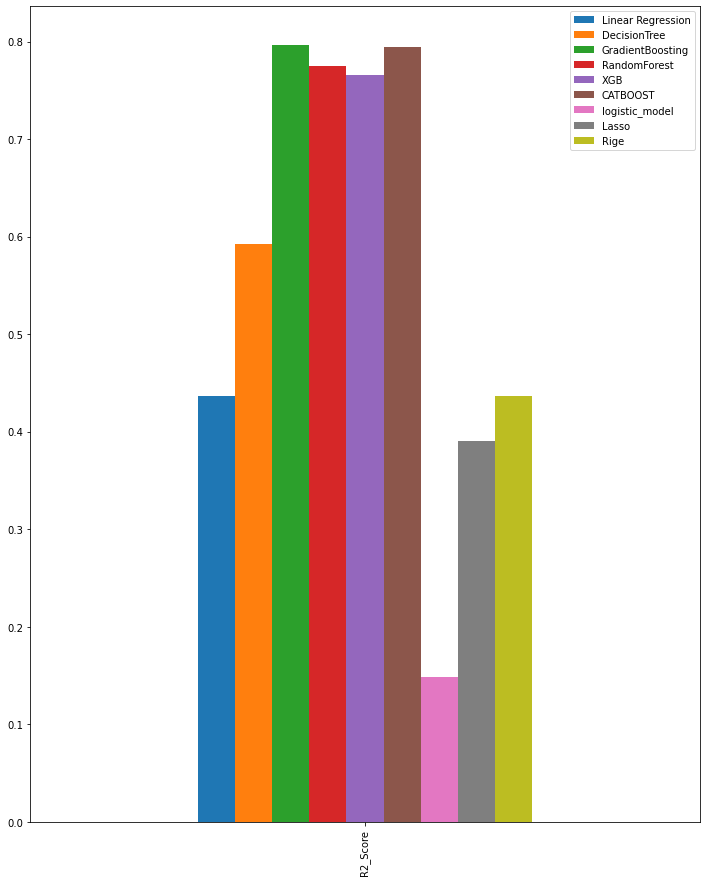

In [318]:
compare= pd.DataFrame(scores, index=["R2_Score"])
compare.plot.bar()
plt.rcParams["figure.figsize"] = (15, 15)

# GradientBoostingRegressor()is the best model

In [319]:
#model= gb.predict()

###  Model Evaluation

In [320]:
gb.score(x_test,y_test)

0.7962229016395054

In [321]:
y_pred= gb.predict(x_test)
y_pred

array([ 3.2,  3.3, 27.3, ...,  4.2,  3.2,  2.8])

In [325]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train) 
predicted_val = gb.predict(x_test)
print('R^2 value: ', round(gb.score(x_test,y_test),3))
RMSE = np.sqrt(mean_squared_error(y_test, predicted_val))
print('RMSE Value: ',round(RMSE,3))

R^2 value:  0.796
RMSE Value:  20.4


In [326]:
RMSE = np.sqrt(mean_squared_error(y_test, predicted_val))
RMSE

20.400389434080047

In [327]:
mae= mean_absolute_error(y_test, predicted_val)
mae

8.578705113850384

In [329]:
pd.DataFrame(data={'Actual_Y':y_test, 'Predicted_Y':y_pred})

,Actual_Y,Predicted_Y
0,4.0,3.221359
1,1.0,3.326297
2,7.0,27.342898
3,5.0,16.561561
4,1.0,2.937594
...,...,...
4503,14.0,18.644231
4504,16.0,20.538408
4505,1.0,4.152428
4506,2.0,3.247498
